# Seaborn

- 여러 변수 간의 관계를 검사하기 위한 데이터 집합 지향 API
- 범주형 변수를 사용하여 관측치 또는 집계 통계량을 표시하기 위한 전문적인 지원 
- 일변량 또는 이변량 분포를 시각화하고 데이터의 부분 집합 간 비교하기 위한 옵션
- 서로 다른 종류의 종속 변수에 대한 선형 회귀 모형의 자동 추정 및 표시
- 복잡한 데이터셋의 전체 구조에 대한 편리한 보기
- 복잡한 시각화를 쉽게 구축할 수 있는 다중 플롯 그리드 구조를 위한 높은 수준의 추상화
- 여러 테마가 내장된 matplotlib 그림 스타일링 제어
- 데이터의 패턴을 충실히 나타내는 색상 팔레트 선택 도구

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
sns.__version__
sns.set(style = "whitegrid")

In [5]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

## scatterplot

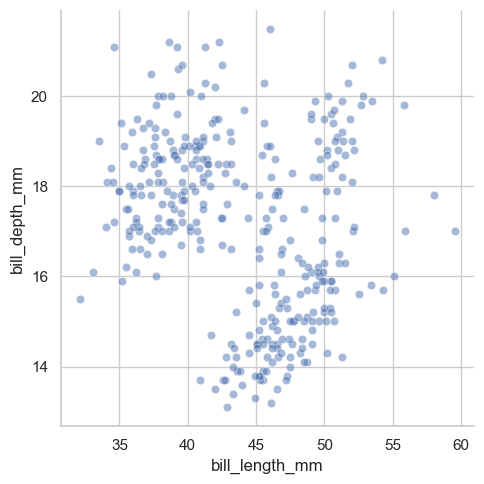

In [3]:
sns.relplot(x = "bill_length_mm", y = "bill_depth_mm", data = penguins, alpha = 0.5)
plt.show();

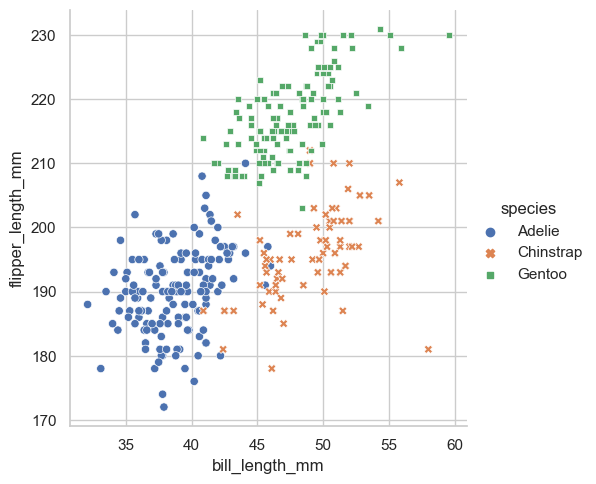

In [4]:
sns.relplot(x = "bill_length_mm", y = "flipper_length_mm",hue = "species", style = "species" ,data = penguins)
plt.show();

# hue, style

<Figure size 1500x800 with 0 Axes>

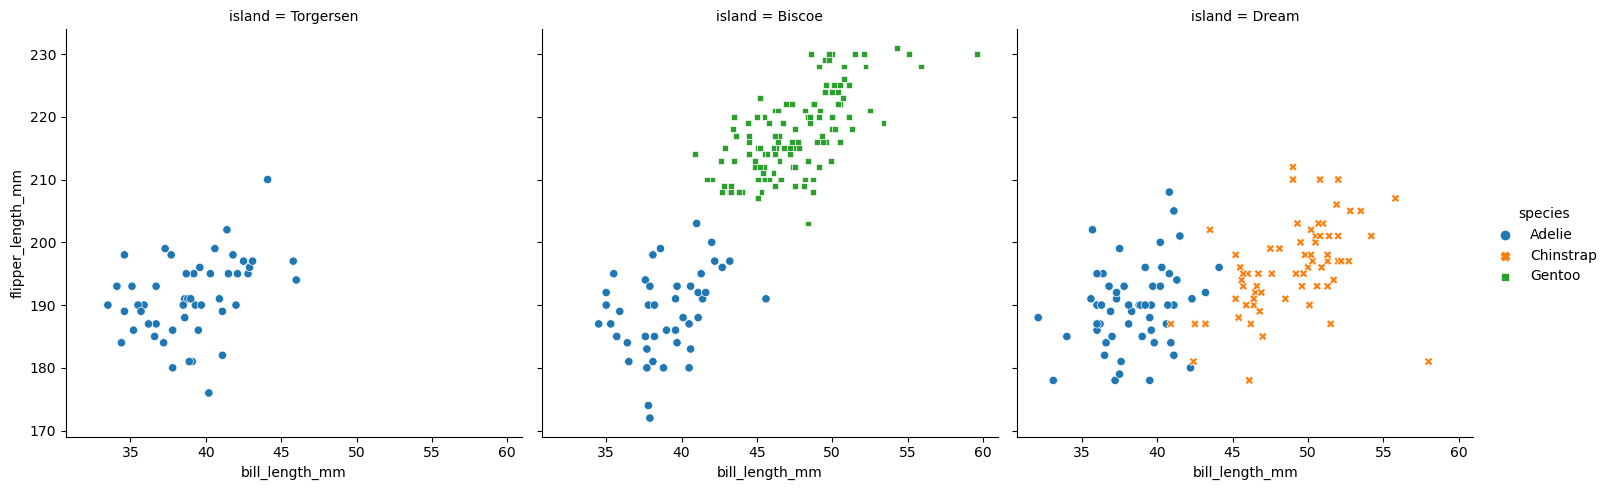

In [47]:
plt.figure(figsize = (15,8))
sns.relplot(x = "bill_length_mm", y = "flipper_length_mm",hue = "species", style = "species",col =  "island" ,data = penguins)
plt.show();

# hue, style
# col, size = (min, max), int

# Line plot

In [48]:
flights = sns.load_dataset("flights")
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

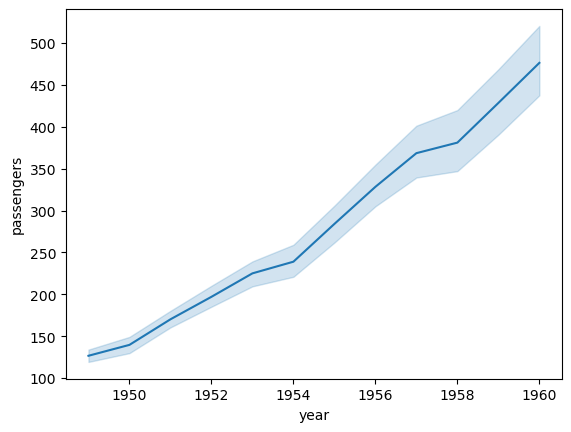

In [49]:
sns.lineplot(data = flights,x = "year", y = "passengers")
plt.show();

In [50]:
sns.lineplot(data = flights,x = "year", y = "passengers", ci = None)
plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_15512\1823294041.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = flights,x = "year", y = "passengers", ci = None)


In [51]:
sns.lineplot(data = flights,x = "year", y = "passengers", ci = "sd")
plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_15512\2223030427.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data = flights,x = "year", y = "passengers", ci = "sd")


In [52]:
sns.relplot(data = flights,x = "year", y = "passengers", kind = "line")
plt.show();

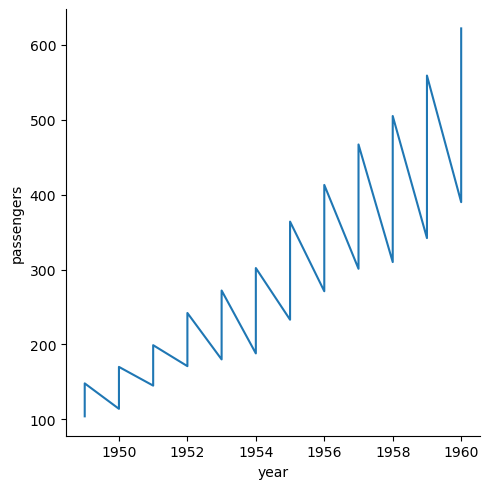

In [53]:
sns.relplot(data = flights,x = "year", y = "passengers",
            estimator = None, kind = "line")
plt.show();

In [54]:
dots = sns.load_dataset("dots")

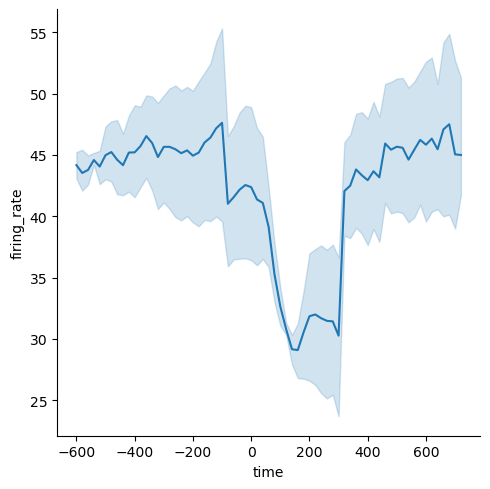

In [55]:
sns.relplot(data = dots,x = "time", y = "firing_rate",
            kind = "line")
plt.show();

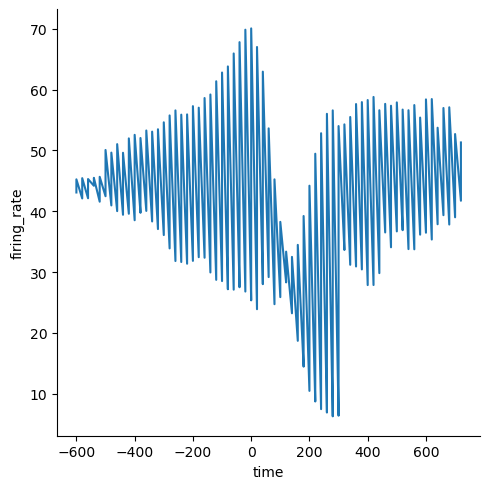

In [56]:
sns.relplot(data = dots,x = "time", y = "firing_rate", estimator = None,
            kind = "line")
plt.show();

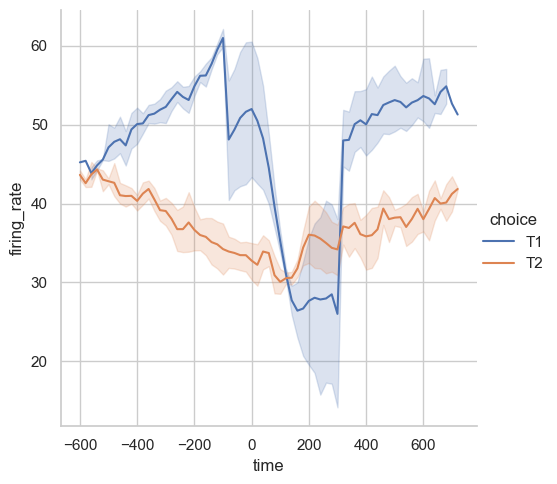

In [14]:
sns.relplot(data = dots,x = "time", y = "firing_rate",
            hue = "choice", kind = "line")
plt.show();

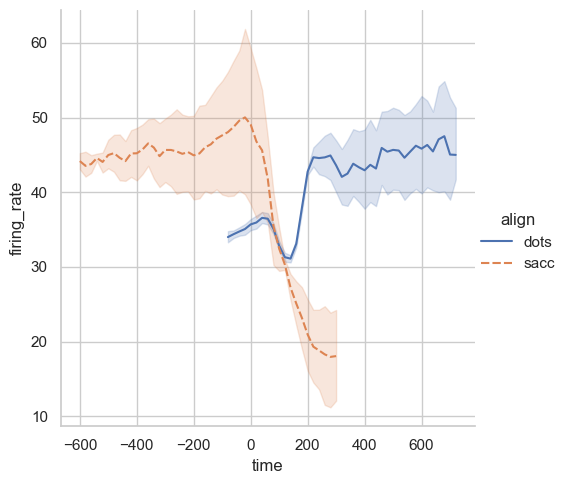

In [15]:
sns.relplot(data = dots,x = "time", y = "firing_rate",
            hue = "align",style = "align",kind = "line")
plt.show();

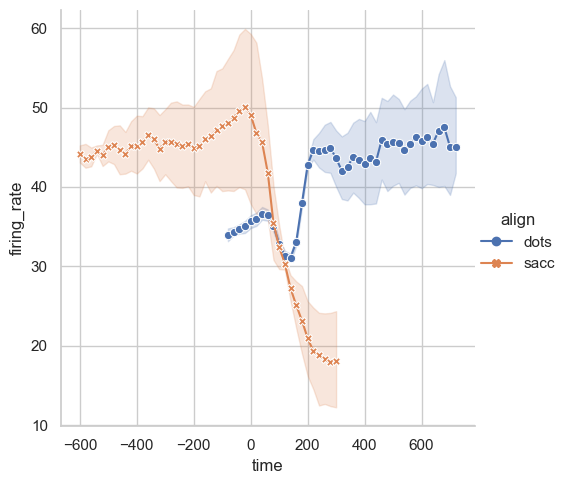

In [16]:
sns.relplot(data = dots,x = "time", y = "firing_rate",
            hue = "align",style = "align",
            dashes = False, markers = True, # 선은 비활성화, 점은 활성화
            kind = "line")
plt.show();

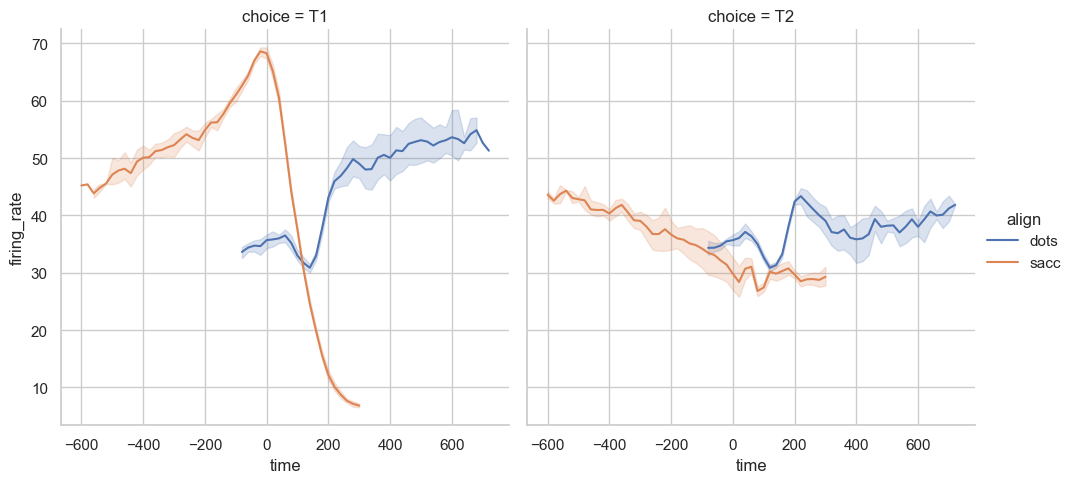

In [17]:
sns.relplot(data = dots,x = "time", y = "firing_rate",
            hue = "align",col = "choice",
            dashes = False, markers = True, # 선은 비활성화, 점은 활성화
            kind = "line")
plt.show();

In [61]:
dots["align"].unique()

array(['dots', 'sacc'], dtype=object)

In [62]:
condition = "align == 'sacc'"

dots.query(condition)

align choice  time  coherence  firing_rate
394  sacc     T1  -600        0.0    45.232512
395  sacc     T1  -580        0.0    45.426403
396  sacc     T1  -560        0.0    43.071647
397  sacc     T1  -560        3.2    44.633471
398  sacc     T1  -540        0.0    45.479431
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[454 rows x 5 columns]

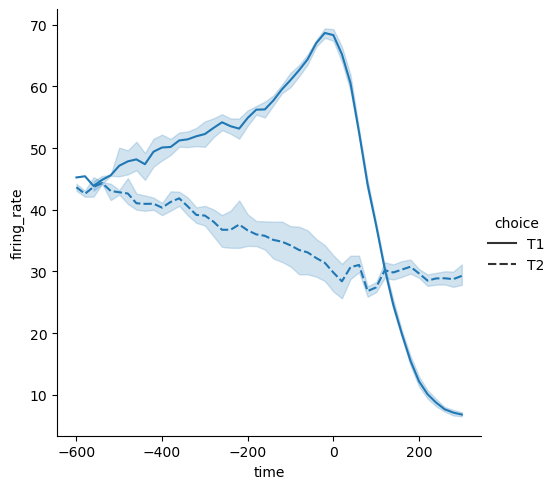

In [63]:
sns.relplot(data = dots.query(condition),x = "time", y = "firing_rate",
            style = "choice",
            kind = "line")
plt.show();

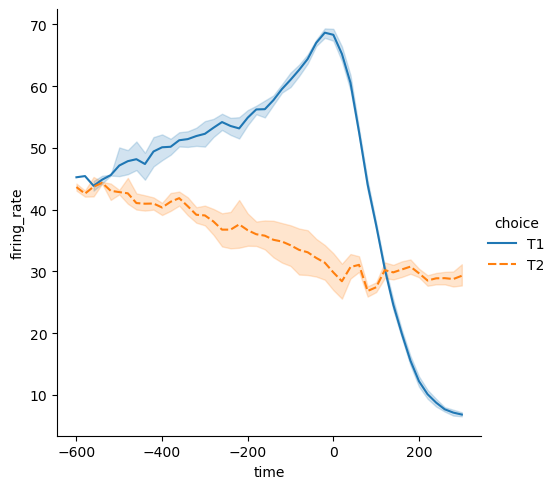

In [64]:
sns.relplot(data = dots.query(condition),x = "time", y = "firing_rate",
            style = "choice",hue = "choice",
            kind = "line")
plt.show();

In [68]:
dots.query(condition)

align choice  time  coherence  firing_rate
394  sacc     T1  -600        0.0    45.232512
395  sacc     T1  -580        0.0    45.426403
396  sacc     T1  -560        0.0    43.071647
397  sacc     T1  -560        3.2    44.633471
398  sacc     T1  -540        0.0    45.479431
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[454 rows x 5 columns]

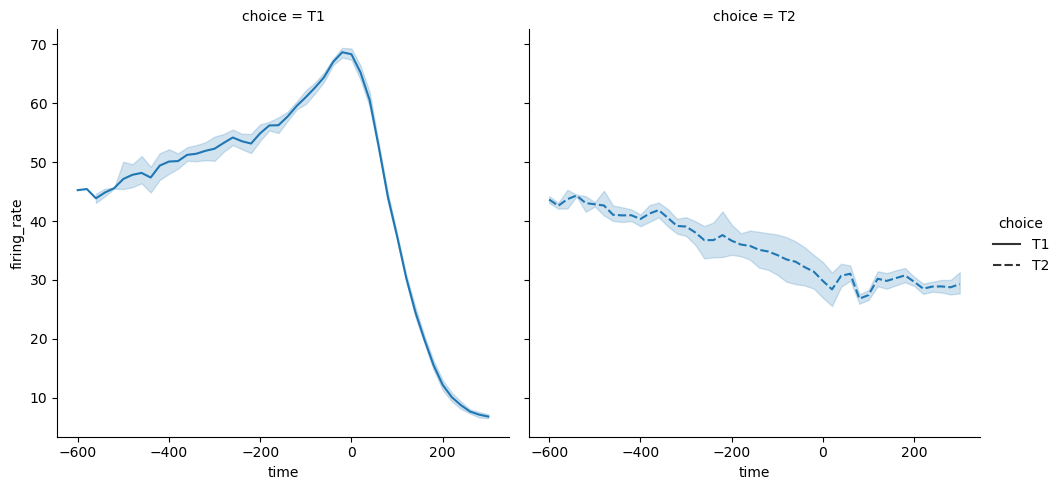

In [65]:
sns.relplot(data = dots.query(condition),x = "time", y = "firing_rate",
            style = "choice", col = "choice",
            kind = "line")
plt.show();

# sorting = True 자동으로 정렬해준다

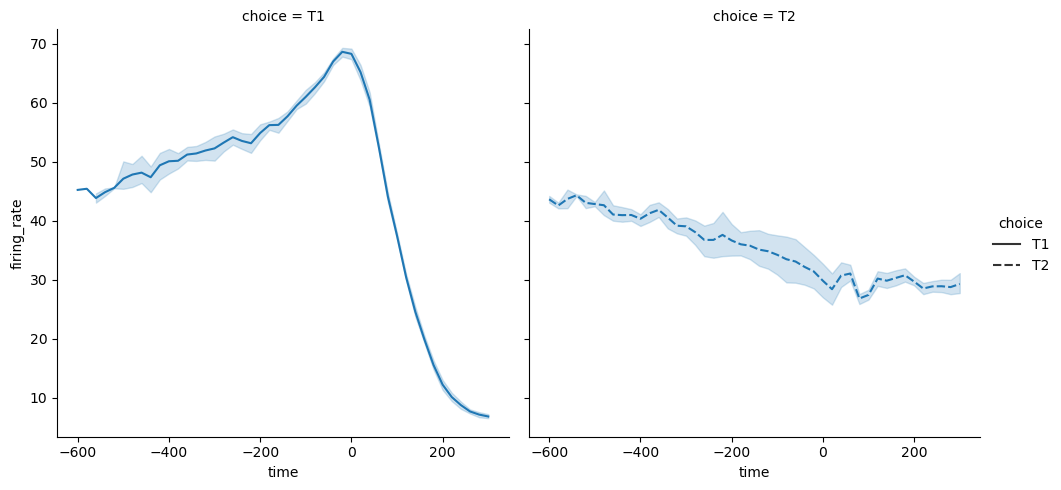

In [70]:
sns.relplot(data = dots.query(condition),x = "time", y = "firing_rate",
            style = "choice", col = "choice",sort = False,
            kind = "line")
plt.show();

# sorting = True 자동으로 정렬해준다

In [71]:
fmri= sns.load_dataset("fmri")
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

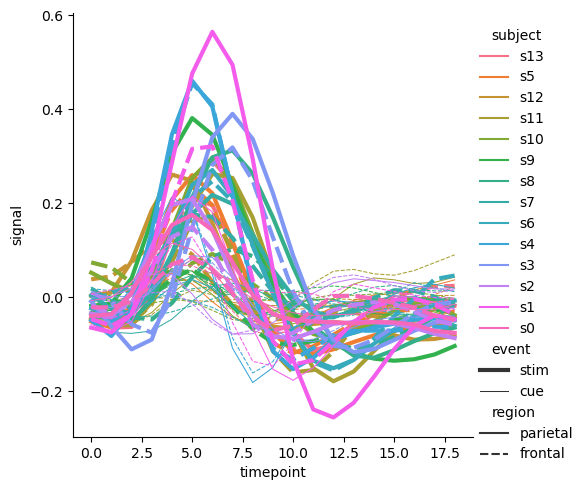

In [72]:
sns.relplot(data = fmri, x = "timepoint", y = "signal",
            hue = "subject", style = "region",size = "event",
            kind = "line")
plt.show();


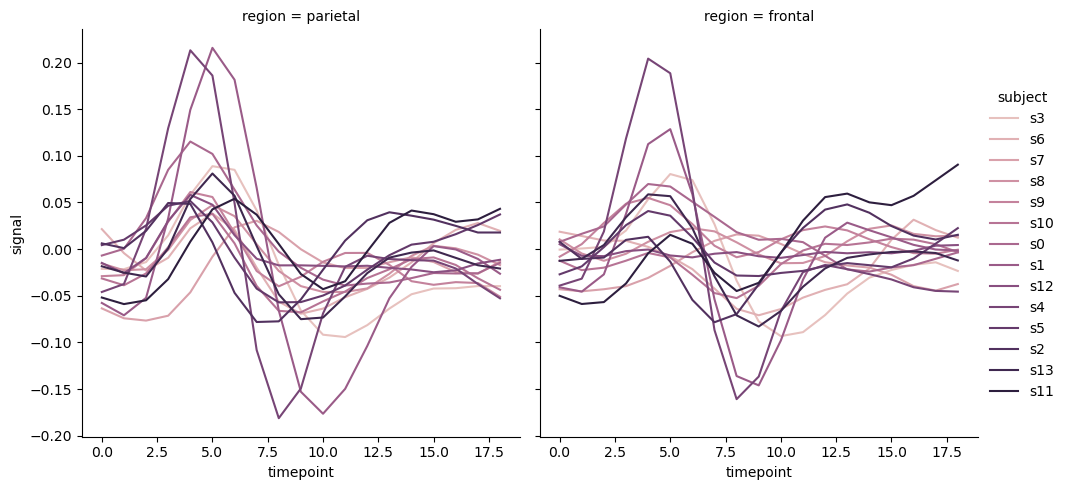

In [73]:
palette = sns.cubehelix_palette(n_colors = 14, light = 0.8)
sns.relplot(data = fmri.query("event=='cue'"), x = "timepoint", y = "signal",
            palette = palette, hue = "subject",col = "region",
            kind = "line")
plt.show();

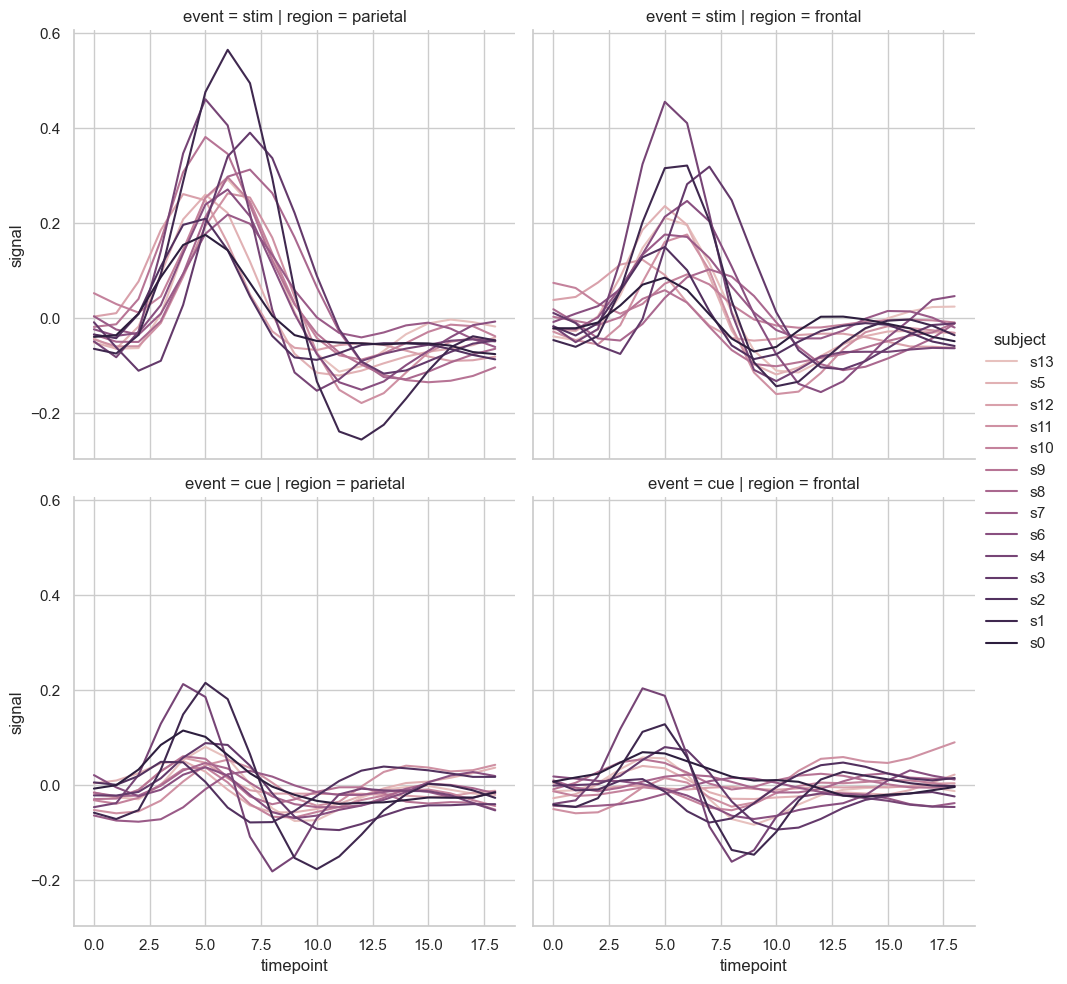

In [24]:
sns.relplot(data = fmri, x = "timepoint", y = "signal",
            palette = palette, hue = "subject",col = "region", row = "event",
            kind = "line")
plt.show();

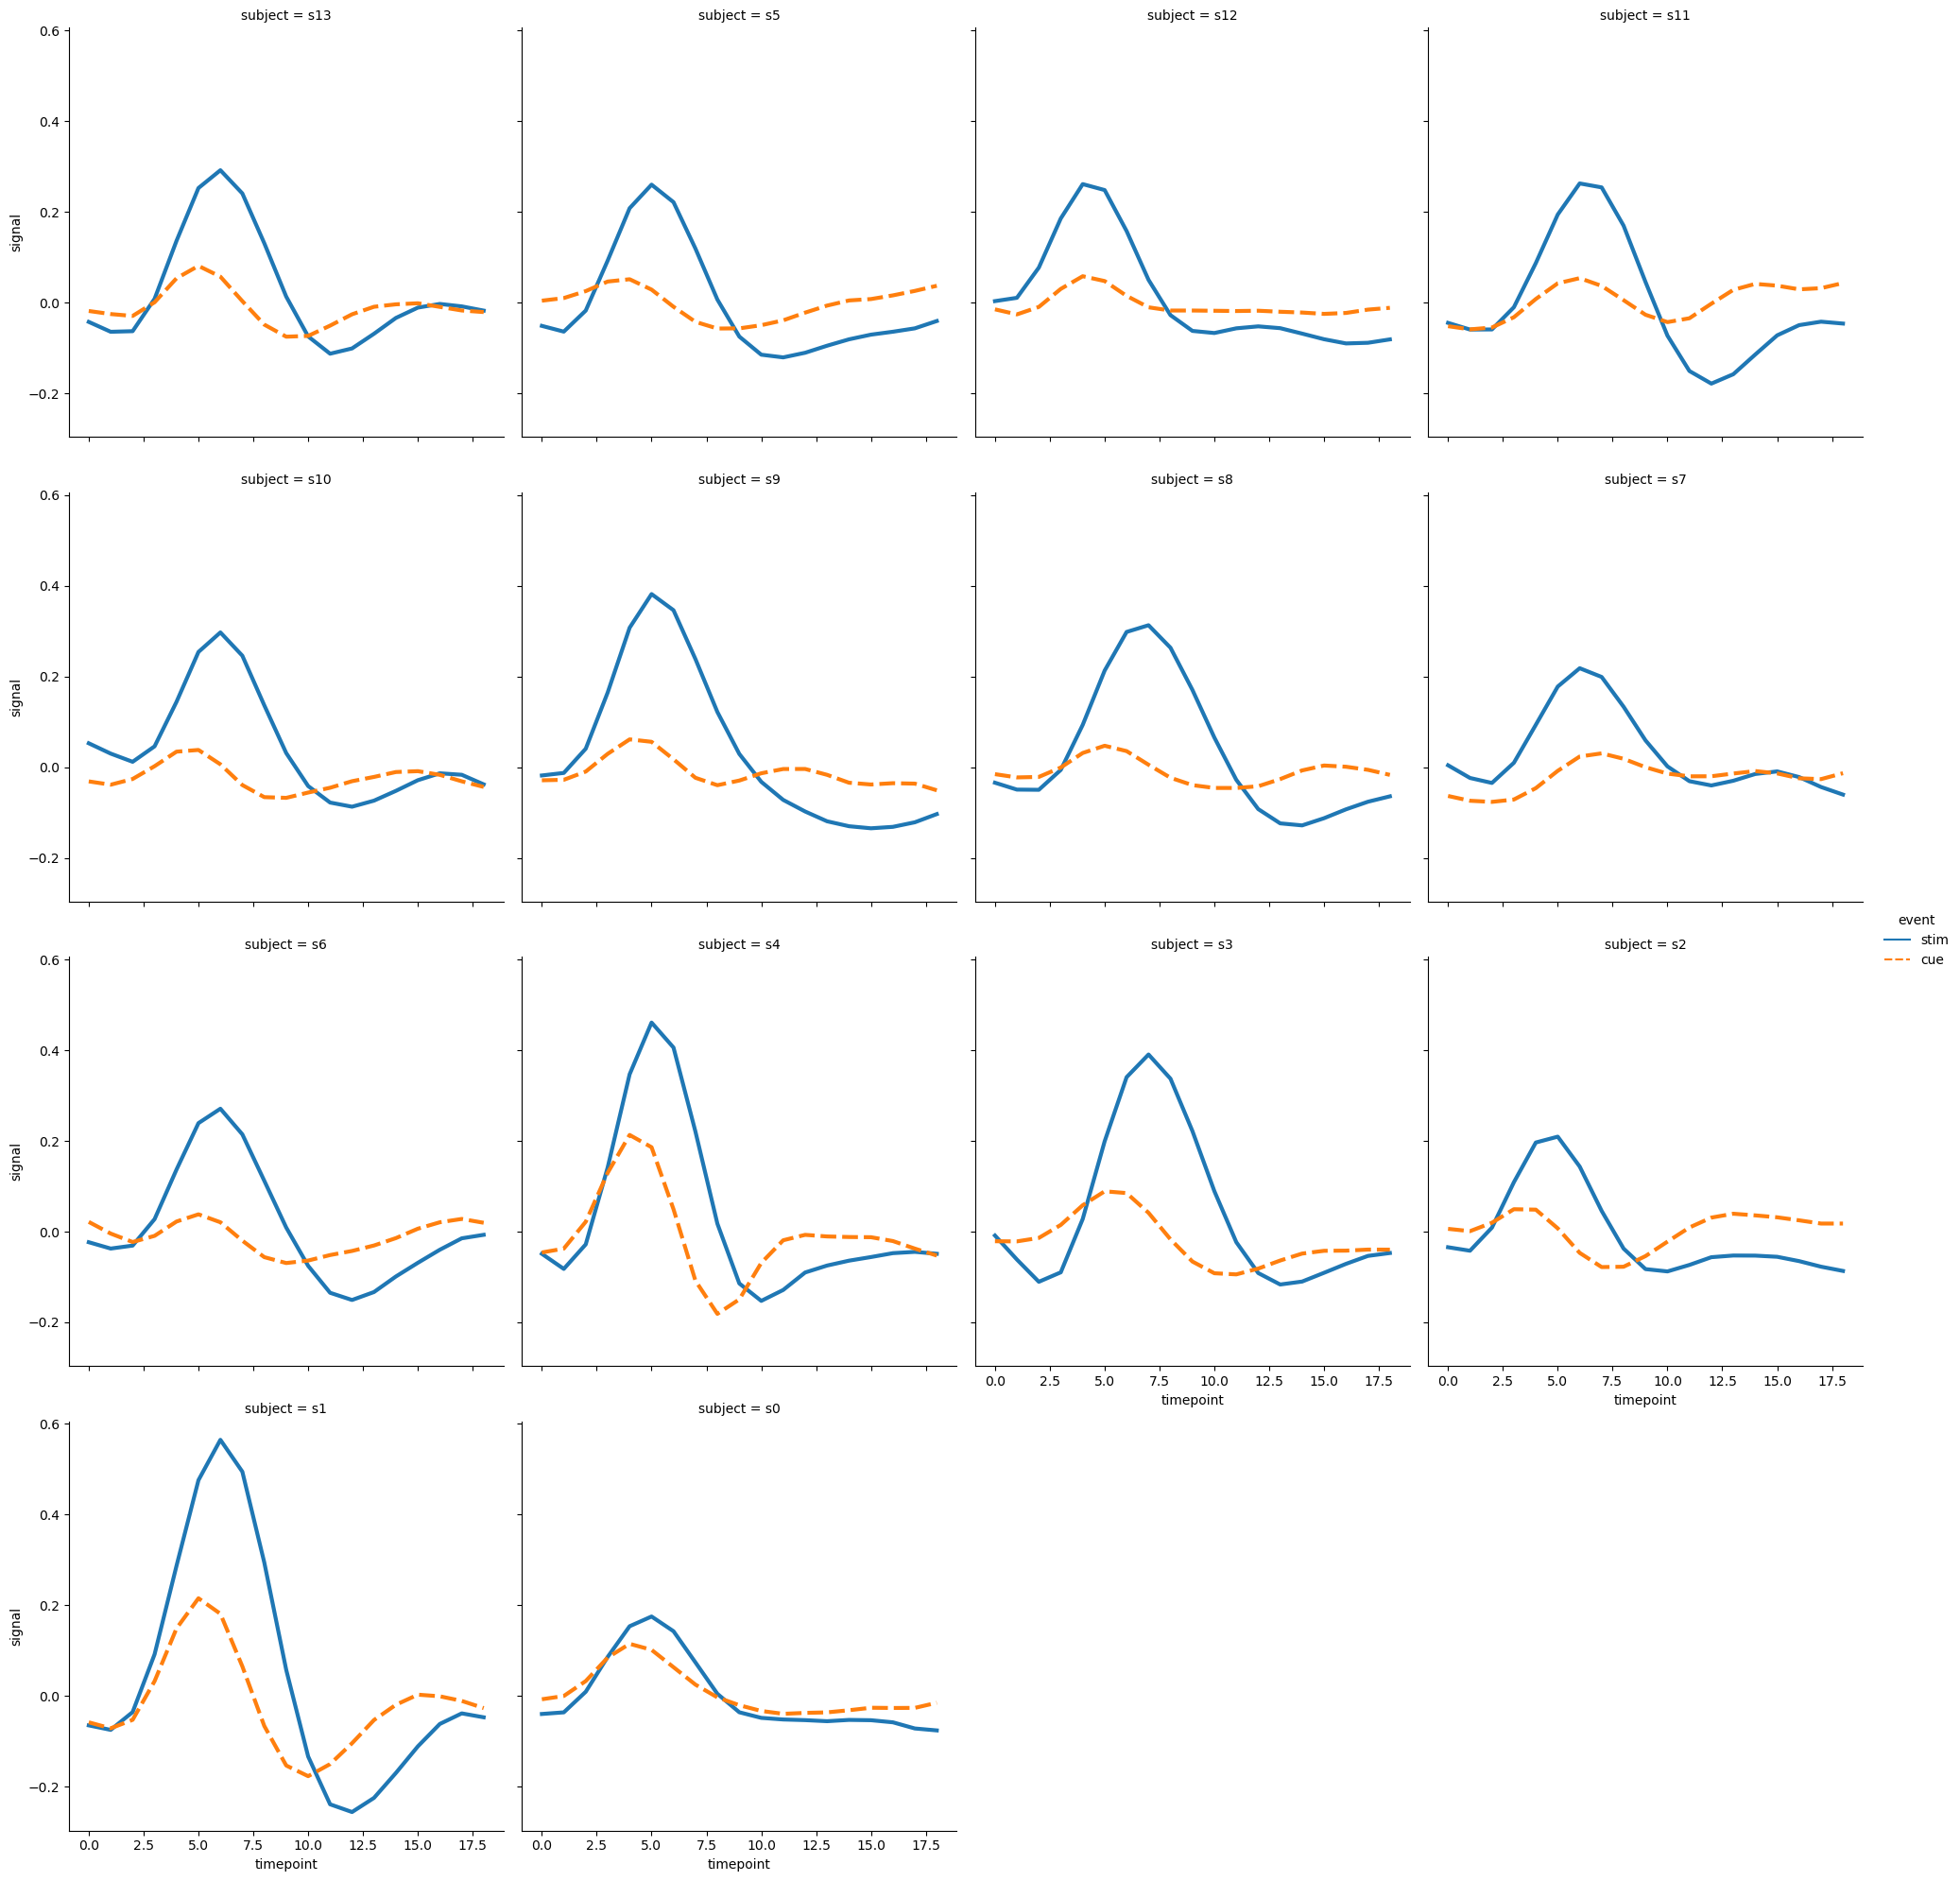

In [74]:
sns.relplot(data = fmri.query("region=='parietal'"), x = "timepoint", y = "signal",
            hue = "event",style = "event",col = "subject", col_wrap = 4, linewidth = 3,
            kind = "line")
plt.show();

In [75]:
tdf = pd.DataFrame(np.random.randn(40,4),
                   index = pd.date_range("2020-01-01", periods = 40),
                  columns = ['A','B','C','D'])
tdf

A         B         C         D
2020-01-01 -0.353288  1.025166 -2.406884  0.779667
2020-01-02 -0.260410 -0.829753 -0.792176  0.793856
2020-01-03  0.566628  1.902130  0.159067 -0.503294
2020-01-04 -0.179624 -1.879903  0.777411 -0.054019
2020-01-05 -0.053326 -0.339076 -1.311976  0.460319
2020-01-06 -0.051281 -0.549589  2.126516 -1.750493
2020-01-07 -0.625280 -2.420678  2.452485  0.163027
2020-01-08  0.333050 -0.005433 -0.141702  1.308735
2020-01-09  1.516179 -1.356251 -0.979362  1.971820
2020-01-10  1.169526 -0.767917  0.134965 -0.091620
2020-01-11 -0.353682  0.771997 -0.374497  0.585739
2020-01-12  1.000674  0.375504 -0.417797 -0.854387
2020-01-13 -0.484793 -0.295884 -0.422469 -0.444301
2020-01-14 -0.622061  0.522513 -0.037942 -0.713812
2020-01-15 -1.503155  1.574382  0.377766  0.546048
2020-01-16 -0.786652  0.126082  0.808601  0.589752
2020-01-17 -1.763367  0.352895 -0.121649 -0.824339
2020-01-18 -1.825285  0.561994 -1.325642 -0.373957
2020-01-19 -0.372058  0.972033  0.960949  1.493173
2020-01-20  0.883146 -0.516038 -1.082569 -1.894558
2020-01-21  0.394595  0.264936  0.071834  1.121491
2020-01-22  0.455874 -0.055927  1.812722 -1.269245
2020-01-23  1.873050  1.894525 -0.296041 -0.324397
2020-01-24  0.068150 -0.828708 -0.652625  1.765417
2020-01-25  0.349671  0.406942  0.733698 -0.119282
2020-01-26  0.375946 -0.283483 -1.854071 -0.832765
2020-01-27  1.276496  1.063527 -0.547890 -0.573845
2020-01-28  0.708443 -0.072943 -0.052347  0.036085
2020-01-29  1.097571 -1.319940  0.835383  1.831147
2020-01-30  1.733423 -1.679513 -0.151651 -0.038363
2020-01-31 -1.220506 -0.636850  0.400795  1.876738
2020-02-01  0.301981 -0.723456 -0.592792  0.495953
2020-02-02 -0.128226  0.542091  0.705618  1.470758
2020-02-03 -0.589117  0.189540  0.177474  0.418977
2020-02-04 -1.972798 -0.550996  1.031479 -1.105853
2020-02-05 -0.501691  0.058520  0.334280 -0.029163
2020-02-06  1.017593  0.162983  0.625472 -0.275129
2020-02-07  2.287866 -1.186330  1.240590  0.622422
2020-02-08  0.280612  0.286094  1.590233  2.023538
2020-02-09 -1.054360 -0.358671 -1.304741  0.694923

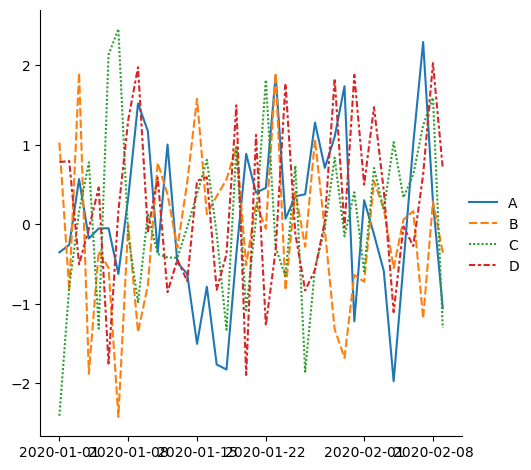

In [76]:
sns.relplot(kind = "line", data = tdf)
plt.show();

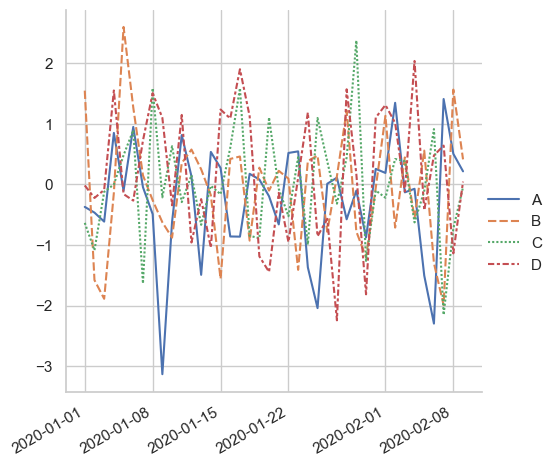

In [28]:
g = sns.relplot(kind = "line", data = tdf)
g.fig.autofmt_xdate()
plt.show();

## 범주형 데이터

### swarm, strip

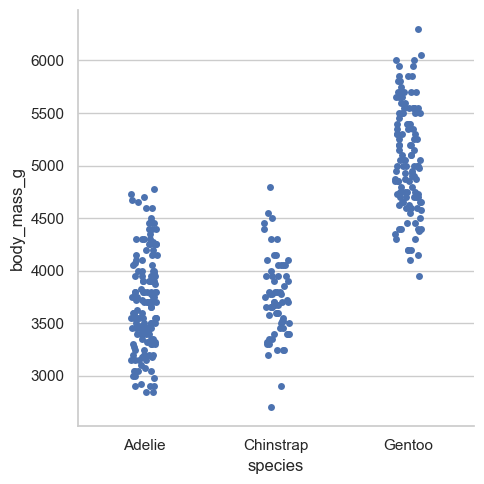

In [29]:
sns.catplot(x = "species",y = "body_mass_g", data= penguins)
plt.show();

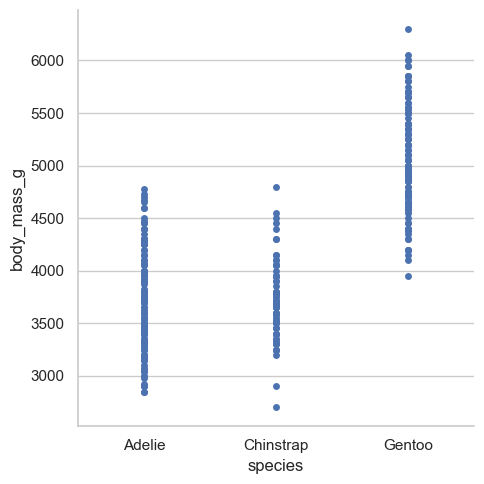

In [30]:
sns.catplot(x = "species",y = "body_mass_g", data= penguins, jitter = False)
plt.show();

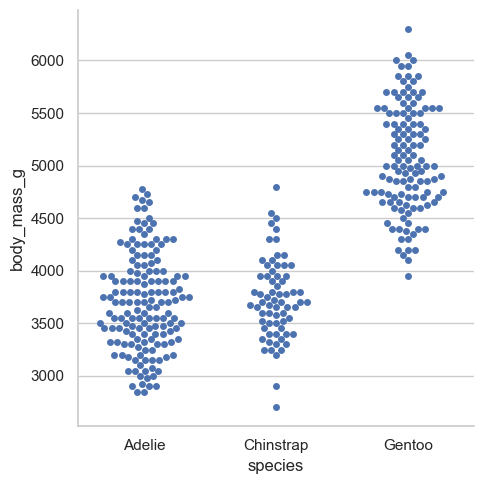

In [31]:
sns.catplot(x = "species",y = "body_mass_g", data= penguins, kind = "swarm")
plt.show();

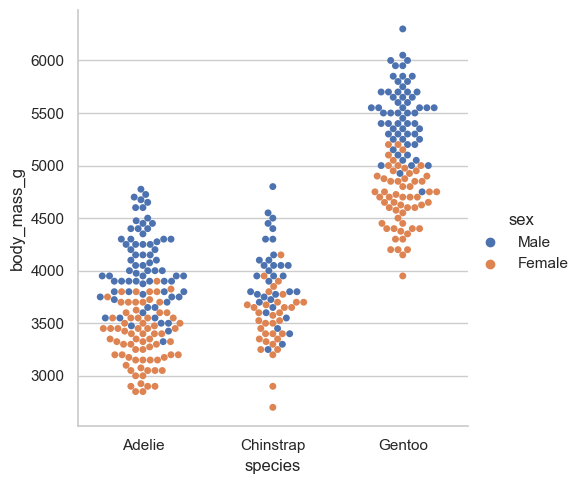

In [32]:
sns.catplot(x = "species",y = "body_mass_g", data= penguins, kind = "swarm",
           hue = "sex")
plt.show();

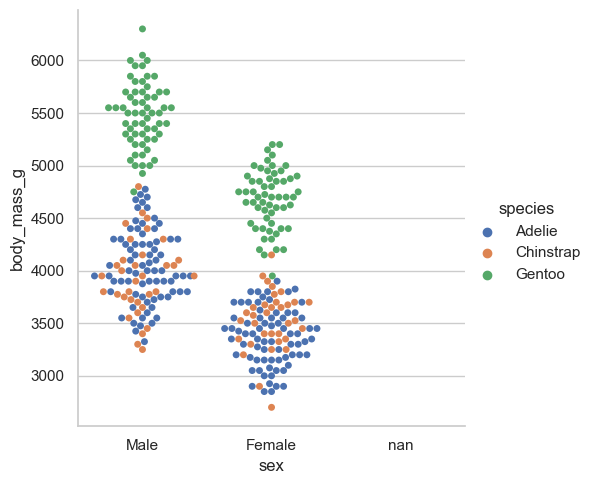

In [33]:
sns.catplot(x = "sex",y = "body_mass_g", data= penguins, kind = "swarm",
           hue = "species")
plt.show();

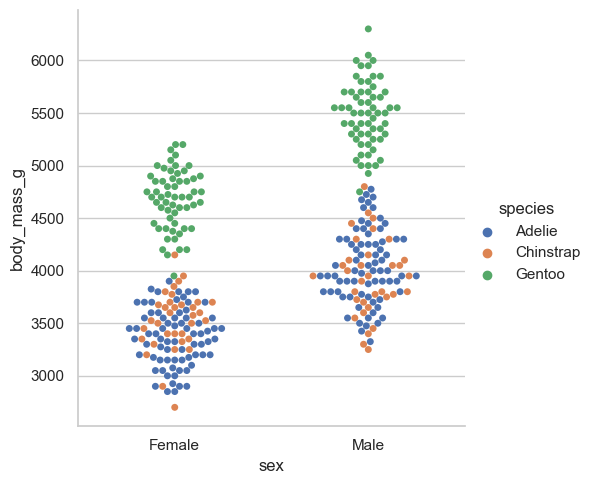

In [34]:
# 표현하고 싶은 순서

sns.catplot(x = "sex",y = "body_mass_g", data= penguins, kind = "swarm",
           hue = "species", order = ["Female","Male"])
plt.show();

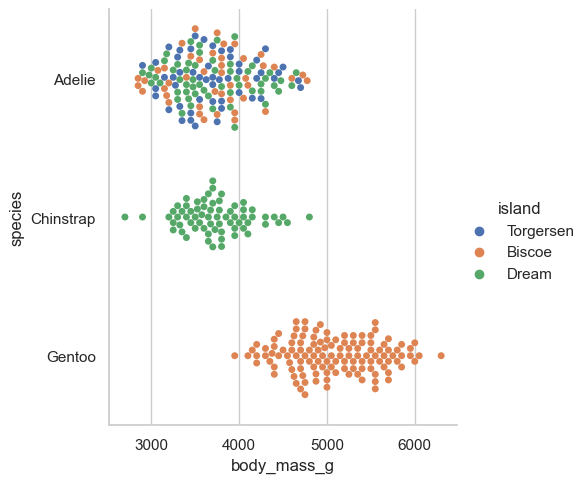

In [35]:
sns.catplot(x = "body_mass_g",y = "species", data= penguins, kind = "swarm",
           hue = "island")
plt.show();

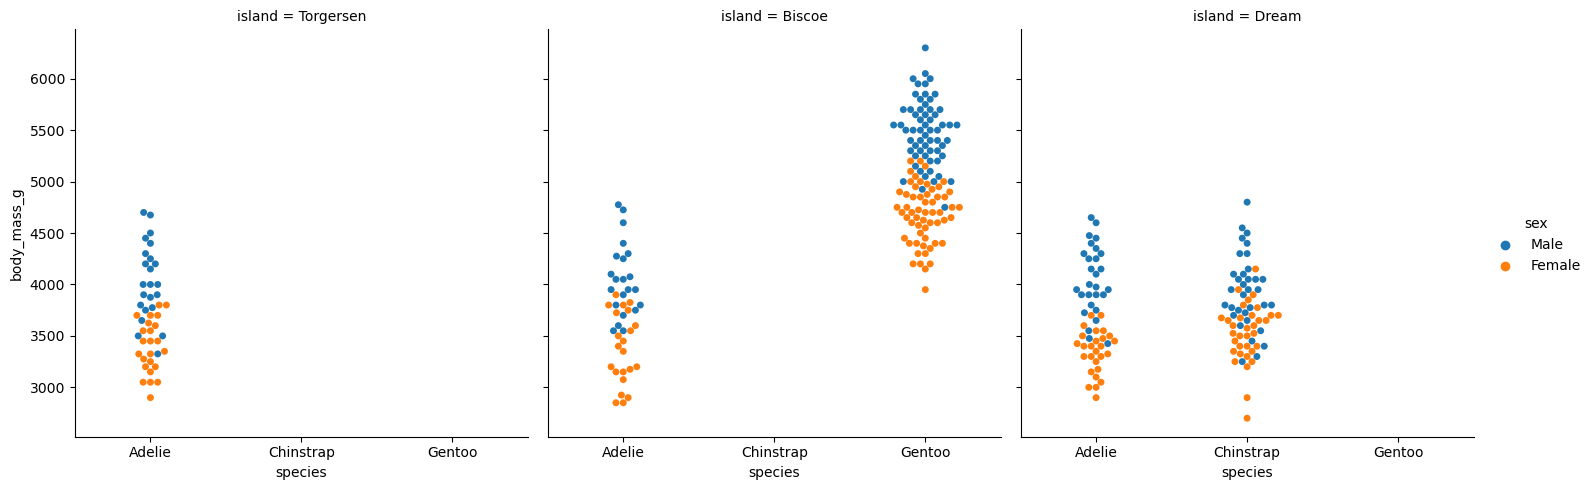

In [77]:
sns.catplot(x = "species", y  ="body_mass_g", hue = "sex", col = "island", aspect = 1, kind = "swarm", data = penguins)
plt.show();

# 간격 조절

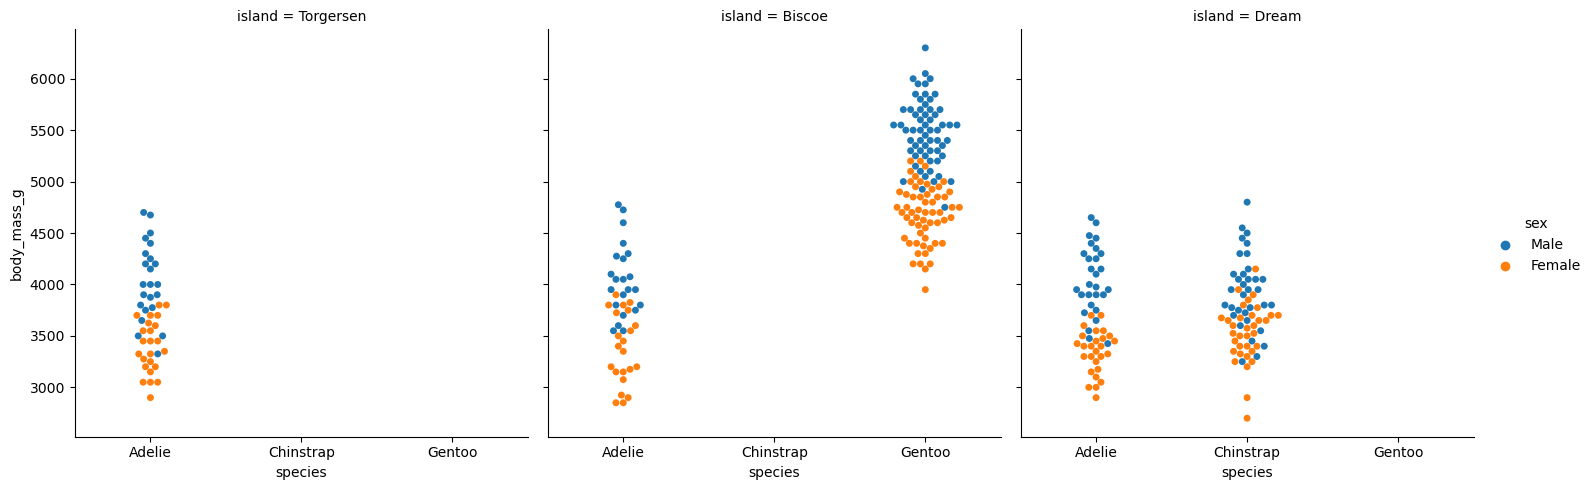

In [78]:
sns.catplot(x = "species", y  ="body_mass_g", hue = "sex", col = "island", kind = "swarm", data = penguins)
plt.show();

# 간격 조절

### boxplot

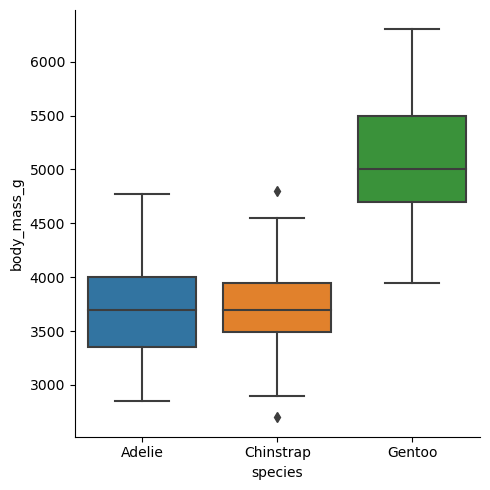

In [79]:
sns.catplot(x = "species", y  ="body_mass_g",
            kind = "box", data = penguins)
plt.show();

# 간격 조절

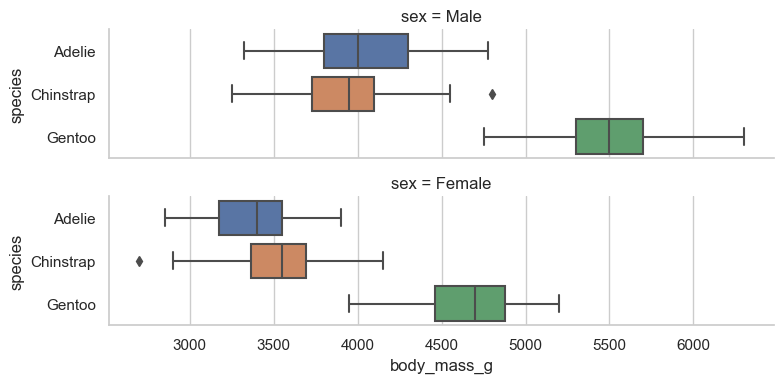

In [38]:
sns.catplot(x = "body_mass_g", y = "species",
           row = "sex", kind = "box",
           height = 2, aspect = 4,
           data = penguins)
plt.show();

In [39]:
iris = sns.load_dataset("iris")
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

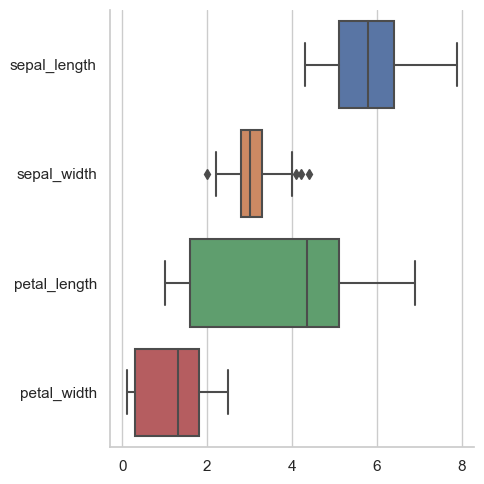

In [40]:
sns.catplot(data = iris, kind = "box", orient = "h" )
plt.show(); # horizontal

### boxenplot

In [41]:
diamonds = sns.load_dataset("diamonds")
diamonds


carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

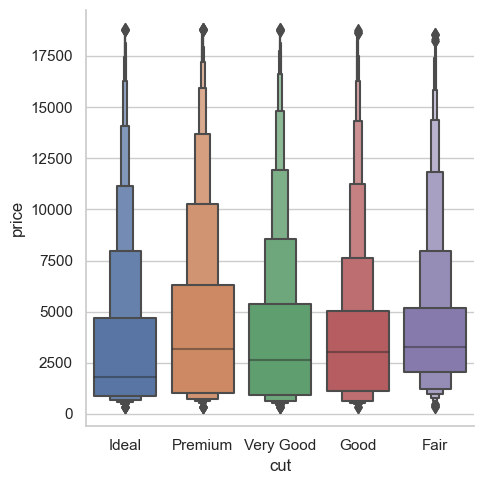

In [42]:
sns.catplot(x = "cut", y = "price", kind = "boxen", data = diamonds)
plt.show();

### violin plot

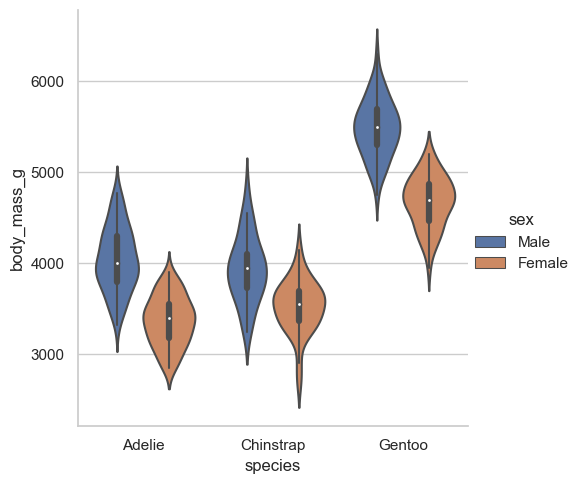

In [43]:
sns.catplot(x = "species", y = "body_mass_g",
           hue = "sex", kind = "violin", data= penguins)
plt.show();

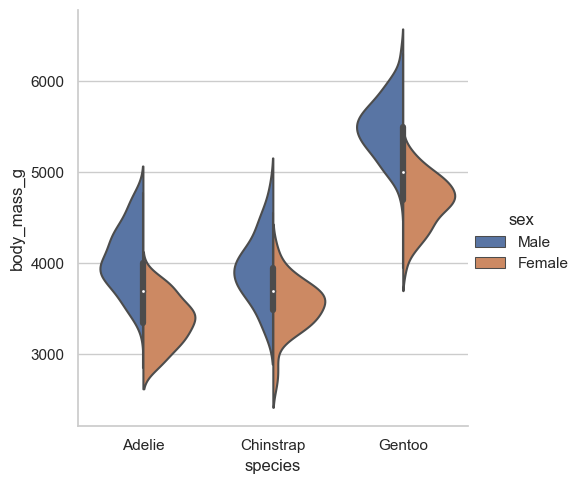

In [44]:
sns.catplot(x = "species", y = "body_mass_g",
           hue = "sex", kind = "violin", 
           split = True, data= penguins)
plt.show();

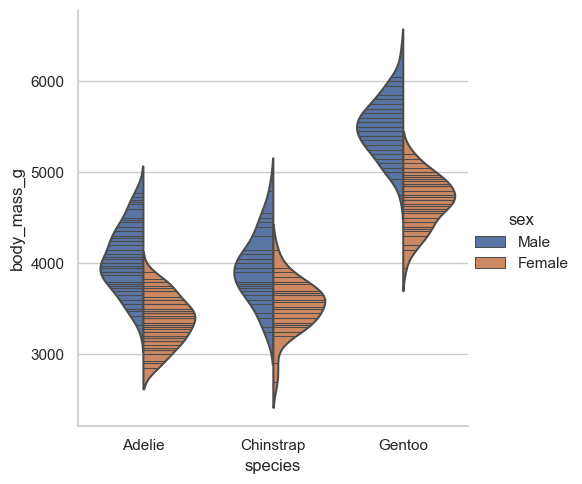

In [45]:
sns.catplot(x = "species", y = "body_mass_g",
           hue = "sex", kind = "violin", 
           split = True, inner = "stick",data= penguins)
plt.show();

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

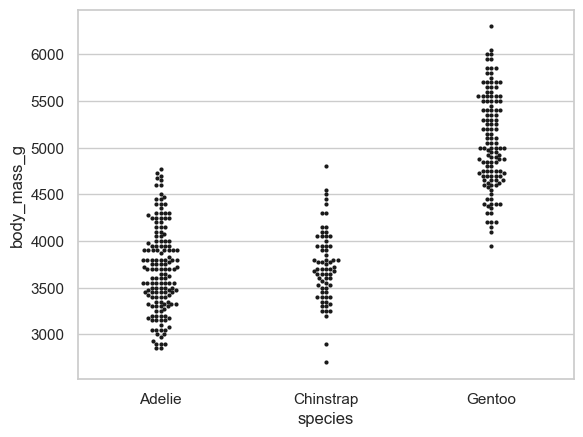

In [46]:
sns.swarmplot(x = "species", y = "body_mass_g",
              color = "k", size = 3, data = penguins)


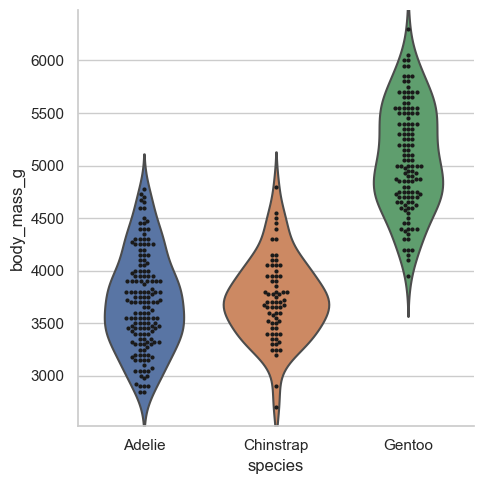

In [47]:
g = sns.catplot(x = "species", y = "body_mass_g",
                kind = "violin", 
                inner = None , data = penguins)
sns.swarmplot(x = "species", y = "body_mass_g",
              color = "k", size = 3, data = penguins, ax = g.ax)
plt.show();



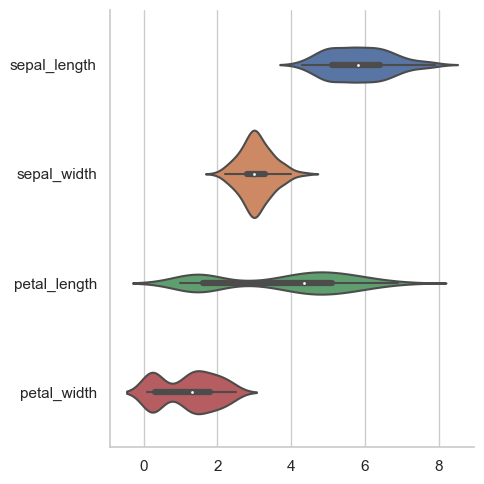

In [48]:
sns.catplot(kind = "violin", orient = "h", data = iris)
plt.show();

## 범주형 추정치 도표

### barplot

In [49]:
mpg = sns.load_dataset("mpg")
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

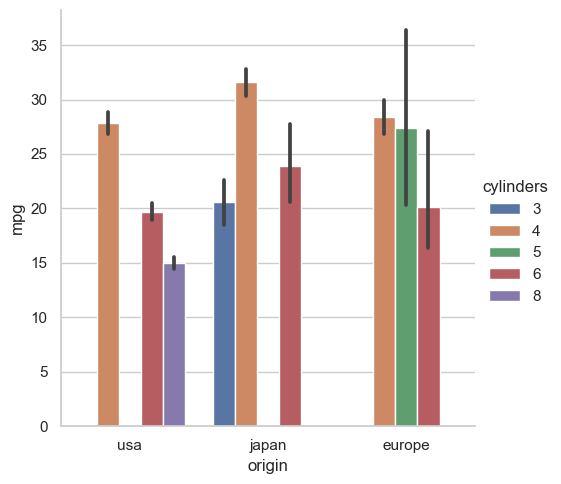

In [50]:
sns.catplot(x = "origin", y ="mpg",
           hue = "cylinders", kind = "bar",
           data = mpg)
plt.show();

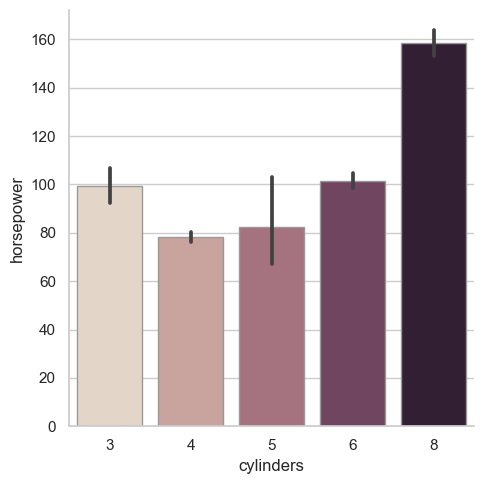

In [51]:
sns.catplot(x = "cylinders", y = "horsepower",
           kind = "bar", palette = "ch:.20", edgecolor = ".6",
           data = mpg)
plt.show();

### pointplot

In [52]:
titanic= sns.load_dataset("titanic")
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

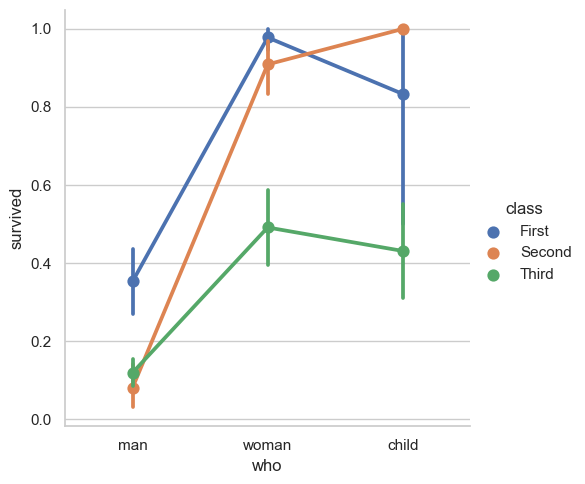

In [53]:
sns.catplot(x = "who", y = "survived", hue = "class", kind = "point", data = titanic)
plt.show();

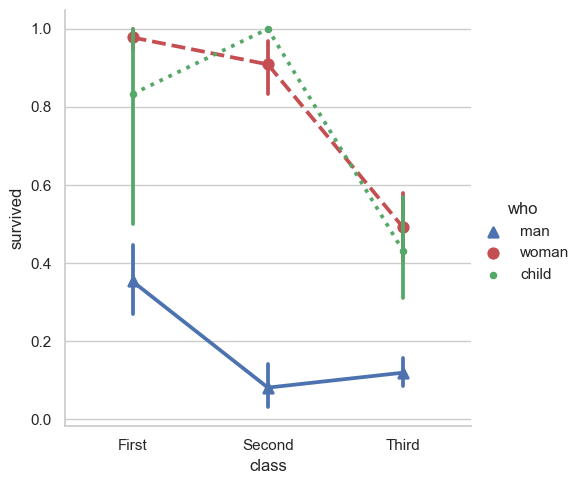

In [54]:
sns.catplot(x = "class", y = "survived", hue = "who",
           palette = {"man" : "b", "woman":"r", "child": "g"},
           markers = ["^", "o","."], linestyles = ["-","--",":"],
           kind = "point", data = titanic)
plt.show();

### countplot

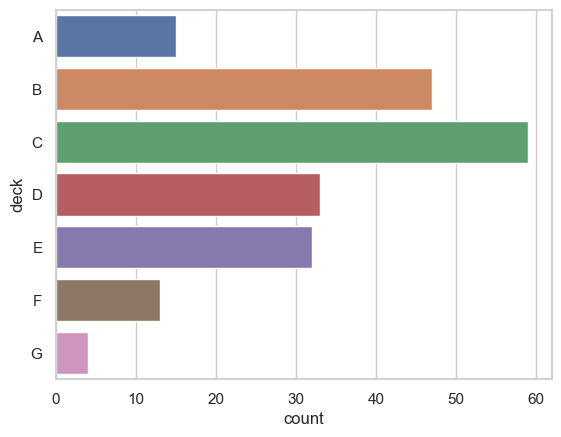

In [55]:
sns.countplot( y = "deck", data = titanic)
plt.show();

## 일변량 분포

### distplot

C:\Users\User\AppData\Local\Temp\ipykernel_12896\3748310612.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


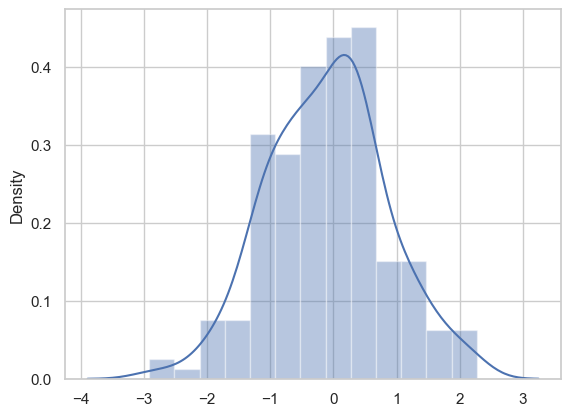

In [56]:
x = np.random.randn(200)
sns.distplot(x)
plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_12896\444302750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde = False)


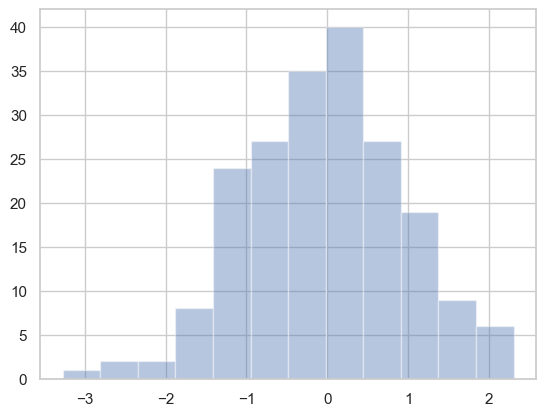

In [57]:
x = np.random.randn(200)
sns.distplot(x, kde = False)
plt.show();

### kdeplot

C:\Users\User\AppData\Local\Temp\ipykernel_12896\462537054.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade = True)


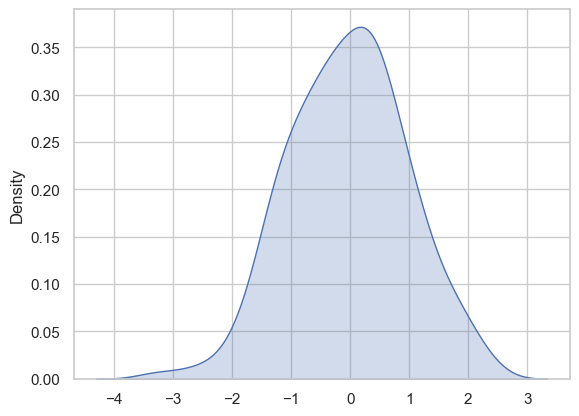

In [58]:
sns.kdeplot(x, shade = True)
plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_12896\1650975940.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw = .2, label = 'bw : 0.2')
C:\Users\User\AppData\Local\Temp\ipykernel_12896\1650975940.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw = 1, label = 'bw : 1')


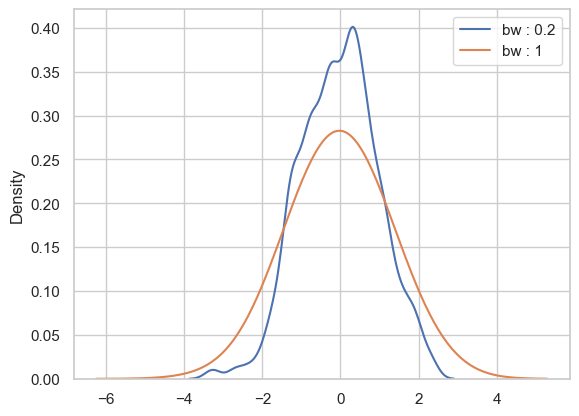

In [59]:
# bw : 민감도?

sns.kdeplot(x, bw = .2, label = 'bw : 0.2')
sns.kdeplot(x, bw = 1, label = 'bw : 1')
plt.legend(loc = "best")
plt.show();

## 이변량 분포

### jointplot

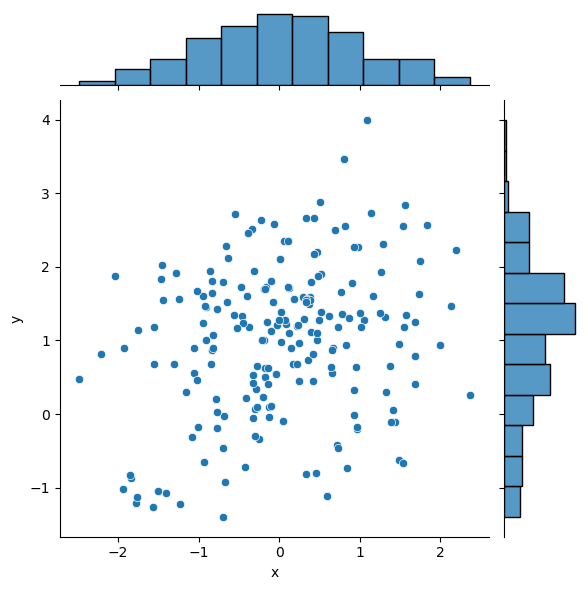

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

mean = [0,1]
cov = [(1, .3), (.3, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns = ['x','y'])

sns.jointplot(data = df, x = 'x', y = 'y')
plt.show();

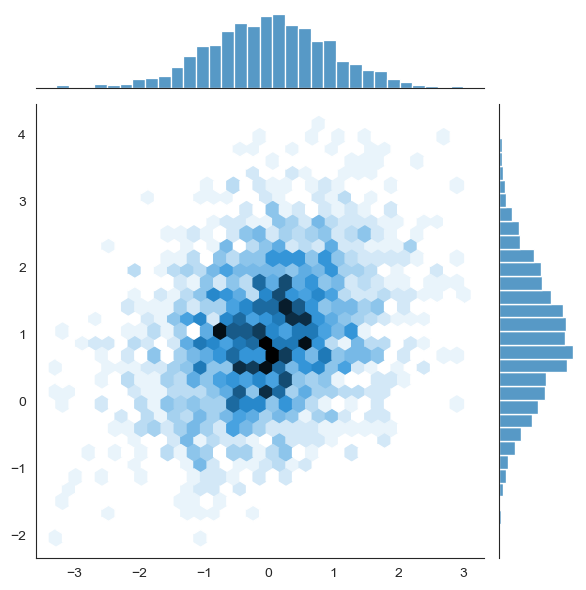

In [11]:
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style("white"):
    sns.jointplot(x = x, y = y, kind = "hex")
    plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


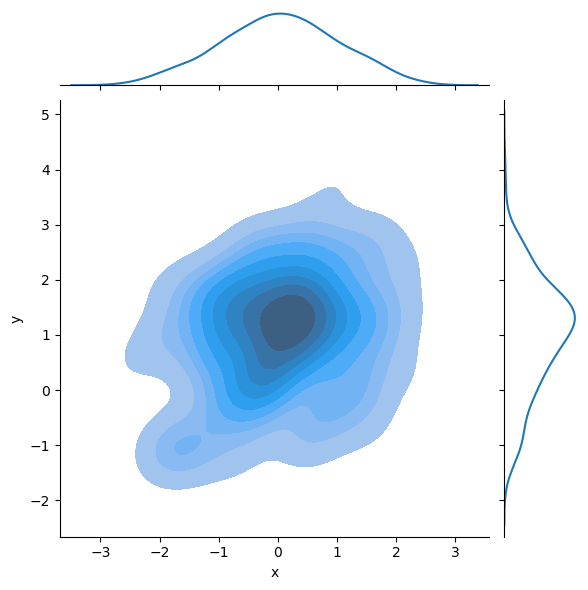

In [12]:
sns.jointplot(data = df, x = 'x', y = 'y', kind = "kde", shade = True)
plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_15512\1963346878.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df.x, y = df.y, cmap = cmap, n_levels = 50, shade = True)


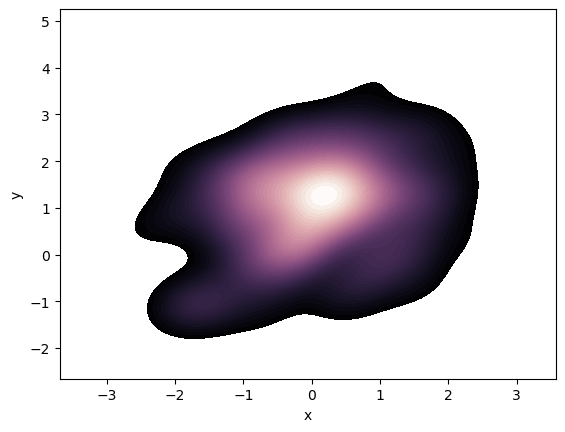

In [13]:
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(x = df.x, y = df.y, cmap = cmap, n_levels = 50, shade = True)
plt.show();


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


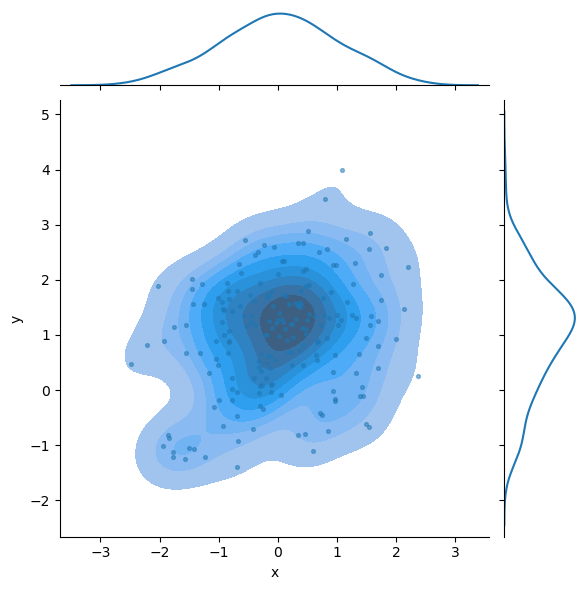

In [18]:
g = sns.jointplot(data = df, x = 'x', y = 'y', kind = "kde", shade = True)
g.plot_joint(plt.scatter, s = 30, linewidth = 1, marker = ".", alpha = 0.5)
plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


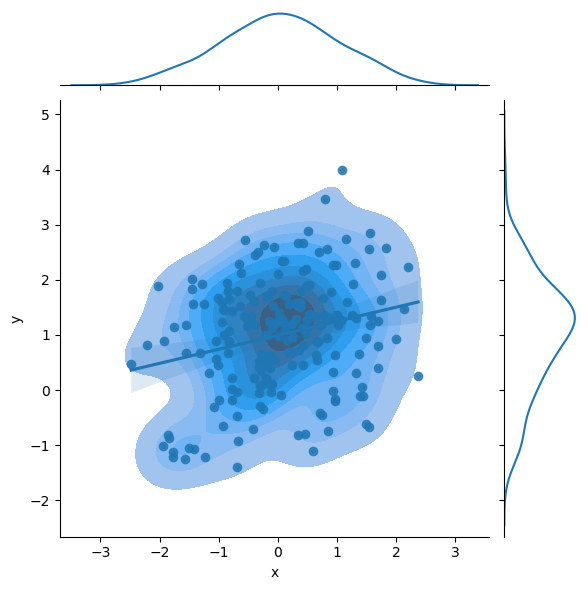

In [15]:
g = sns.jointplot(data = df, x = 'x', y = 'y', kind = "kde", shade = True)
g.plot_joint(sns.regplot)
g.plot_joint(plt.scatter, s = 30, linewidth = 1, marker = ".", alpha = 0.5)

plt.show();

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


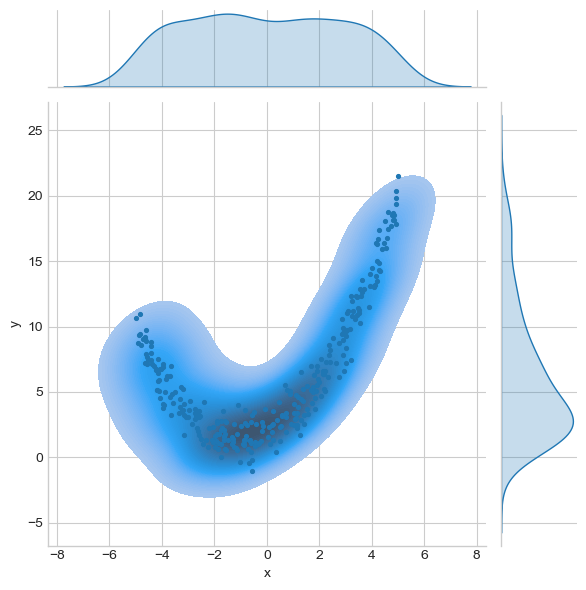

In [89]:
plt.style.use("seaborn-whitegrid")

g = sns.jointplot(x = 'x', y = 'y', data = df, kind = 'kde', shade = True, n_levels = 60, fill = True)
g.plot_joint(plt.scatter,s = 30, linewidth = 1, marker = ".")
g.ax_joint.collections[0].set_alpha(0)

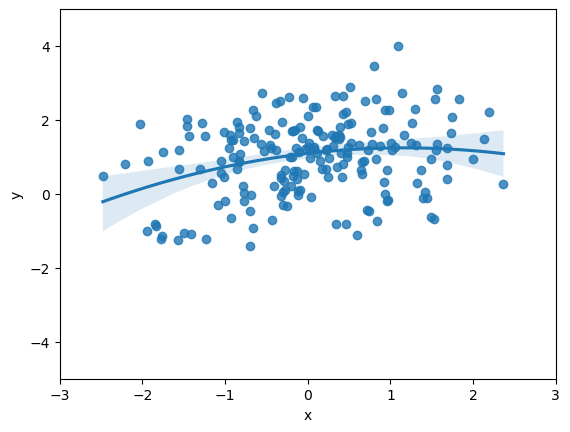

In [19]:
sns.regplot(data = df, x = 'x', y = 'y', fit_reg = True, order = 2)
plt.xlim(-3,3)
plt.ylim(-5,5)

plt.show();

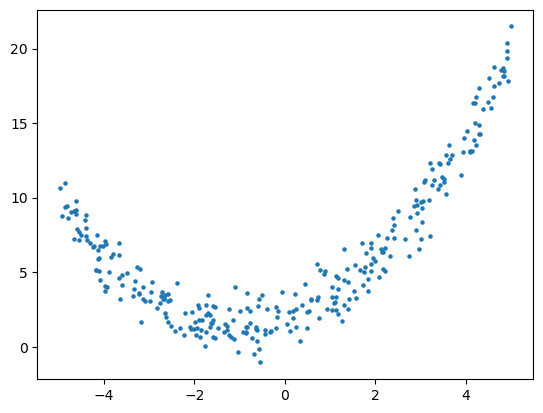

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 300

x = 10*np.random.rand(n, 1)-5
y = 0.5 * x**2 + x + 2 + np.random.randn(n,1)

df = pd.DataFrame()


df["x"] = x.ravel()
df["y"] = y.ravel()

plt.scatter(x, y, s=5)

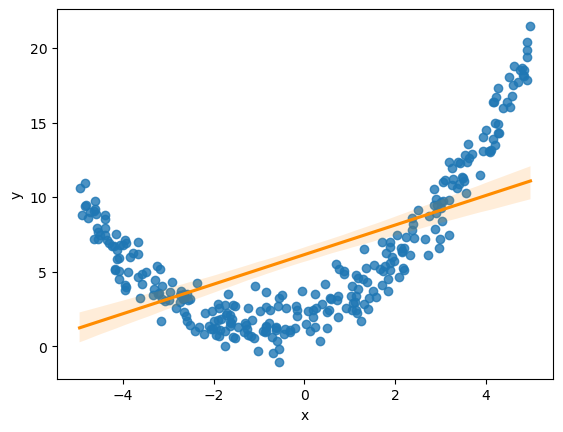

In [35]:
sns.regplot(data = df, x = 'x', y = 'y', fit_reg = True, order = 1,line_kws = {"color":"darkorange"}, ci = 95)

plt.show();

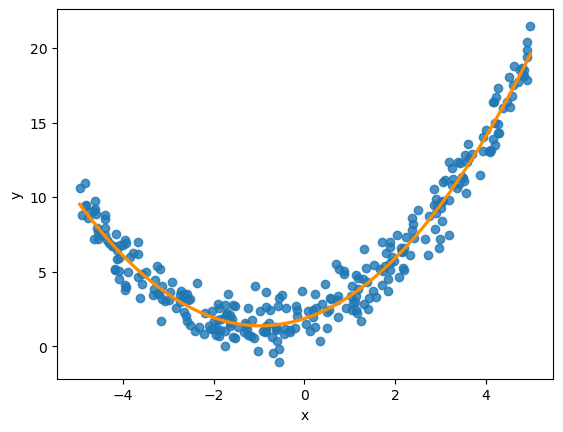

In [36]:
sns.regplot(data = df, x = 'x', y = 'y', fit_reg = True, order = 2,line_kws = {"color":"darkorange"}, ci = 95)

plt.show();

## 페어와이즈 관계 시각화

In [90]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

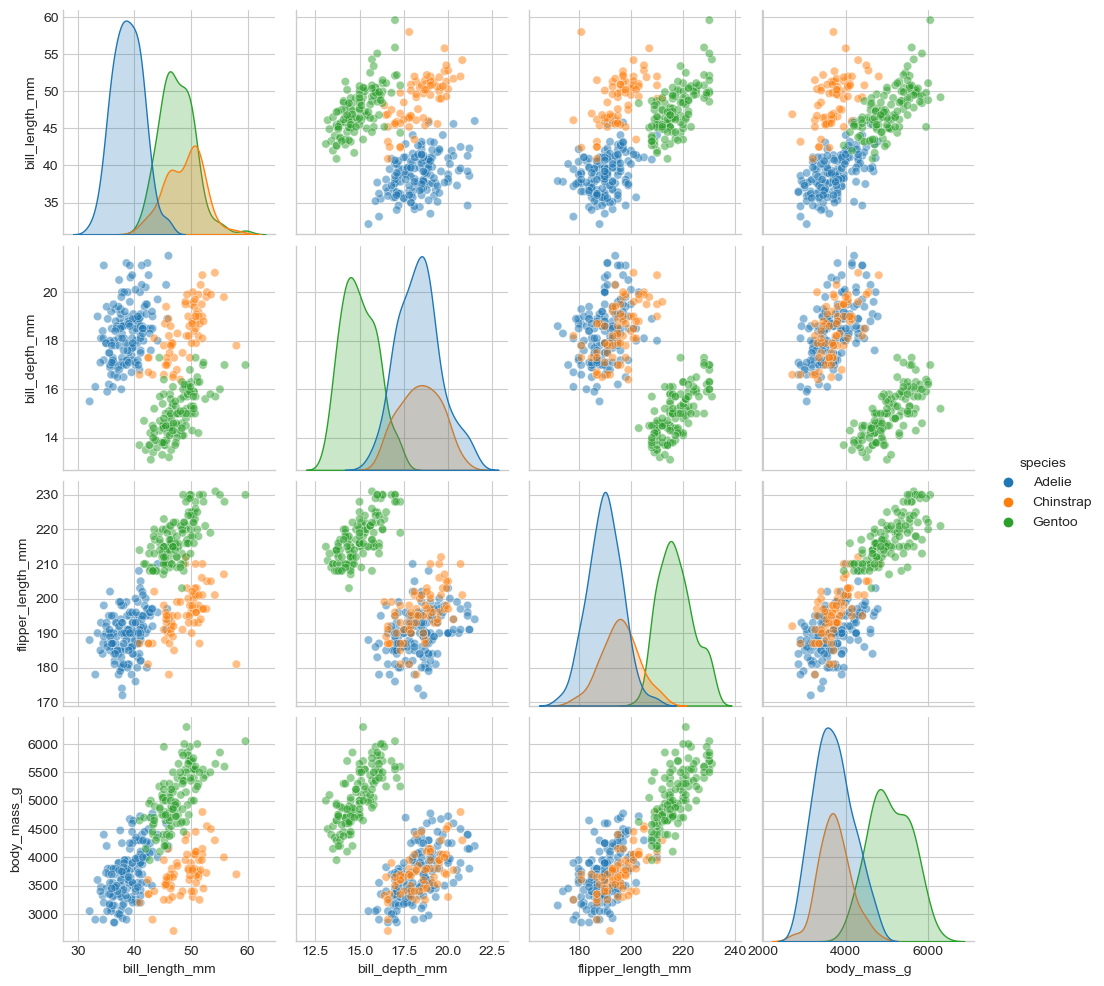

In [95]:
sns.pairplot(penguins, hue = "species", plot_kws = {"alpha" : 0.5})

# 수치형 데이터만 사용

In [96]:
g = sns.PairGrid(penguins)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 6, shade = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwar

## 히트맵

In [42]:
udata = np.random.rand(20,30)
sns.heatmap(udata, vmin = 0 , vmax = 1)

<AxesSubplot:>

<AxesSubplot:>

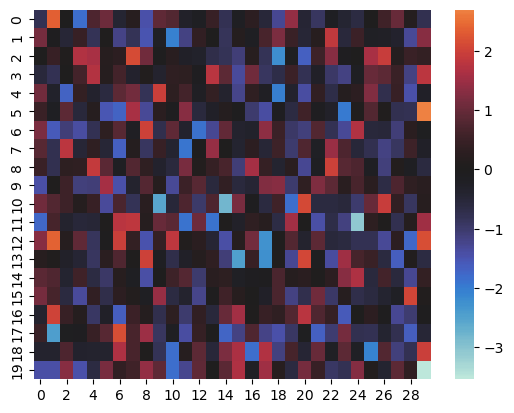

In [43]:
ndata = np.random.randn(20,30)
sns.heatmap(ndata, center = 0)

<AxesSubplot:xlabel='year', ylabel='month'>

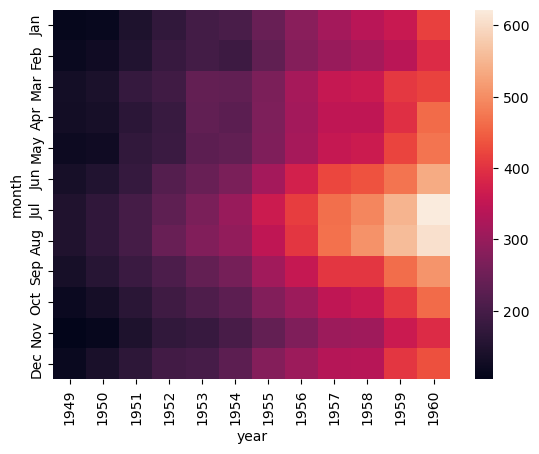

In [44]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)

<AxesSubplot:xlabel='year', ylabel='month'>

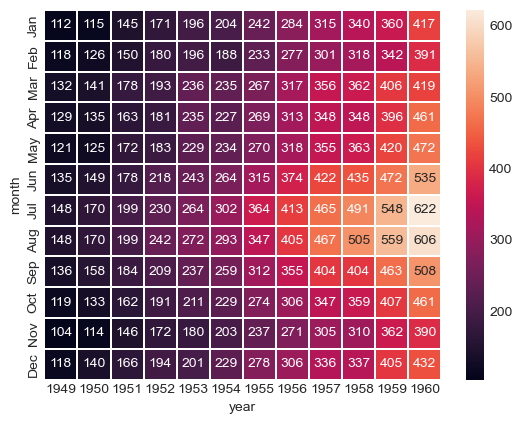

In [98]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights, annot = True, fmt = "d", lw = 0.2)

In [101]:
brain_networks = sns.load_dataset("brain_networks", header = [0,1,2], index_col = 0)
brain_networks

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148   1.621340   
919      -36.288868 -10.762070 -30.356262 -23.319504  14.252188 -27.559860   

network          4                     5             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...    0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...   57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...   28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...   71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915      -3.376562  -8.764893   0.017912 -25.305094  ...   58.285793   
916      17.911247  24.653582 -32.935612 -21.783203  ...   59.864819   
917      60.628521  62.027023 -32.800556 -37.021500  ...   68.767868   
918      33.765560  55.356071 -14.330512 -17.224781  ...  103.155251   
919      17.279512 -19.060152  26.558777  21.377319  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 62 columns]

In [104]:
networks = brain_networks.columns.get_level_values("network")
used_networks = np.arange(1,18)
used_columns = (networks.astype(int).isin(used_networks))
brain_networks = brain_networks.loc[:, used_columns]

network_pal = sns.husl_palette(17, s = .5)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(networks, index = brain_networks.columns).map(network_lut)

sns.clustermap(brain_networks.corr(), center = 0, cmap = "RdBu_r", row_colors = network_colors, col_colors = network_colors,
              linewidth = .5, figsize = (12,12));

# 선형관계 시각화

## 선형 회귀 모델 시각화 함수

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

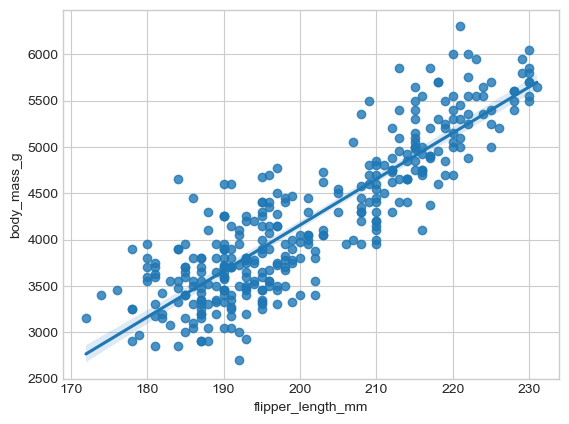

In [105]:
sns.regplot(x = "flipper_length_mm", y ="body_mass_g", data = penguins)

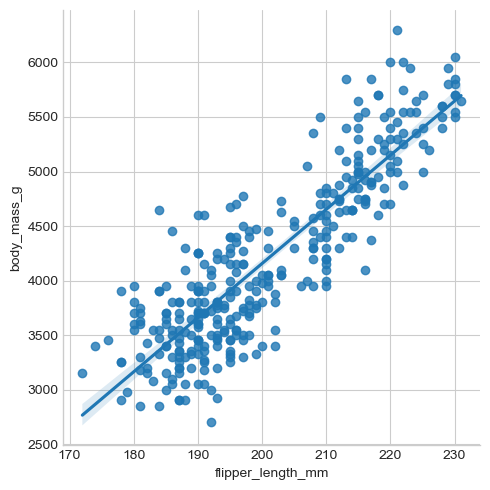

In [106]:
sns.lmplot(x = "flipper_length_mm", y ="body_mass_g", data = penguins)

In [108]:
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

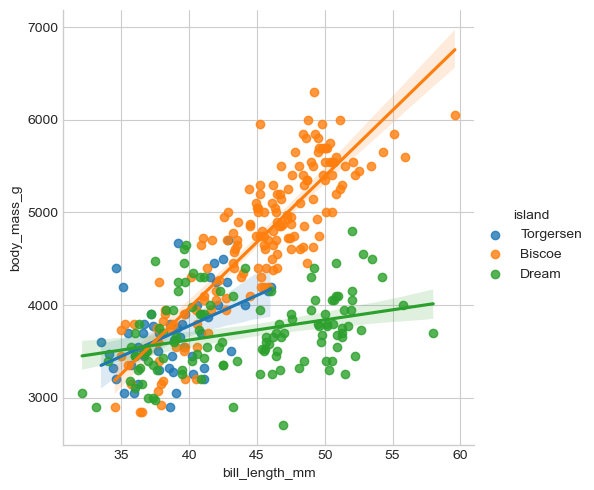

In [109]:
sns.lmplot(x = "bill_length_mm", y ="body_mass_g", hue = "island",data = penguins)

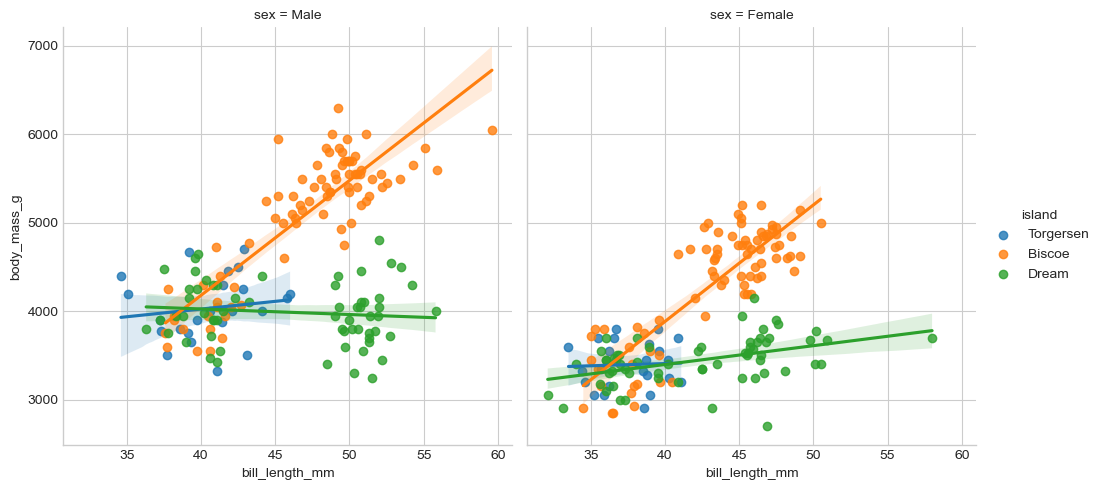

In [110]:
sns.lmplot(x = "bill_length_mm", y ="body_mass_g",col = "sex", hue = "island",data = penguins)

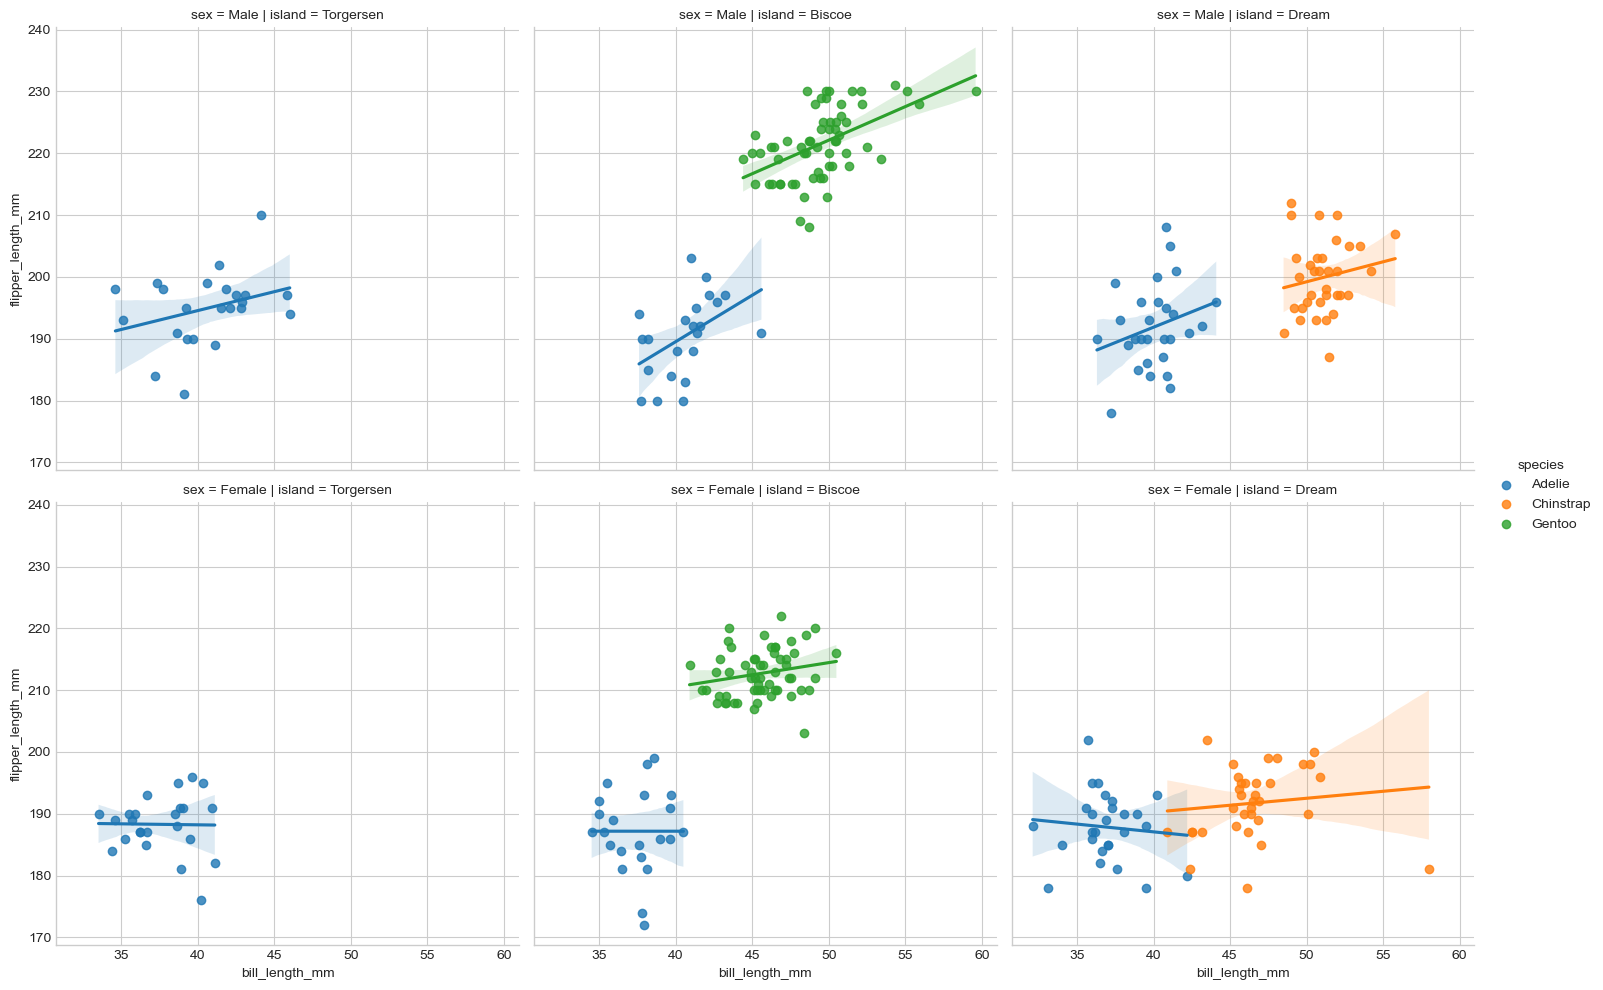

In [116]:
sns.lmplot(x = "bill_length_mm", y ="flipper_length_mm",hue = "species",
           col = "island", row = "sex",data = penguins)

In [118]:
anscombe = sns.load_dataset("anscombe")
anscombe.describe()

x          y
count  44.000000  44.000000
mean    9.000000   7.500682
std     3.198837   1.958925
min     4.000000   3.100000
25%     7.000000   6.117500
50%     8.000000   7.520000
75%    11.000000   8.747500
max    19.000000  12.740000

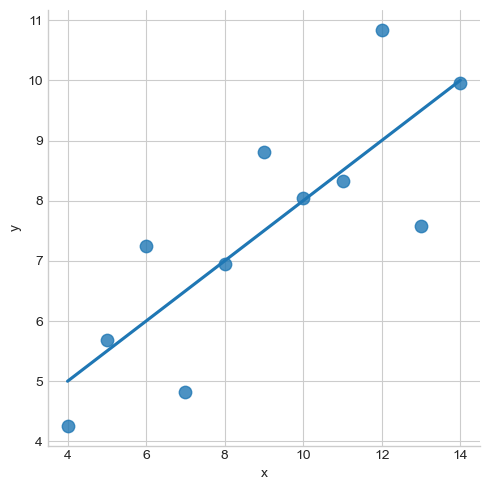

In [119]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'I'"), ci = None, scatter_kws = {"s" : 80})

In [122]:
# 비선형 차수 지정 order
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = {"s" : 80}, order = 2)

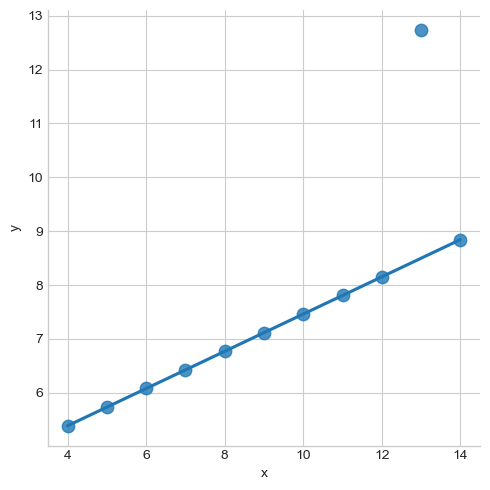

In [124]:
sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"),
           robust = True, ci = None, scatter_kws = {"s" : 80})

In [127]:
penguins["long_bill"] = (penguins["bill_length_mm"] > penguins["bill_length_mm"].mean())

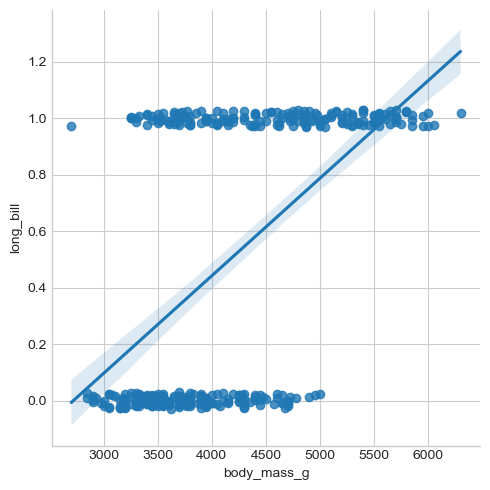

In [130]:
sns.lmplot(x = "body_mass_g", y = "long_bill", y_jitter = 0.03, data = penguins)

In [131]:
sns.lmplot(x = "body_mass_g", y = "long_bill", y_jitter = 0.03, data = penguins, logistic=True)

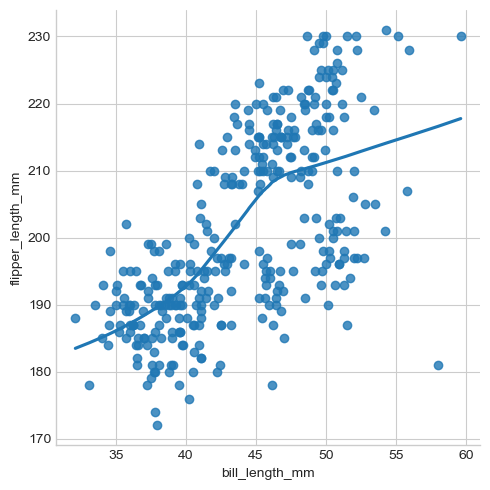

In [132]:
sns.lmplot(x = "bill_length_mm", y = "flipper_length_mm", lowess = True, data = penguins)

<AxesSubplot:xlabel='x', ylabel='y'>

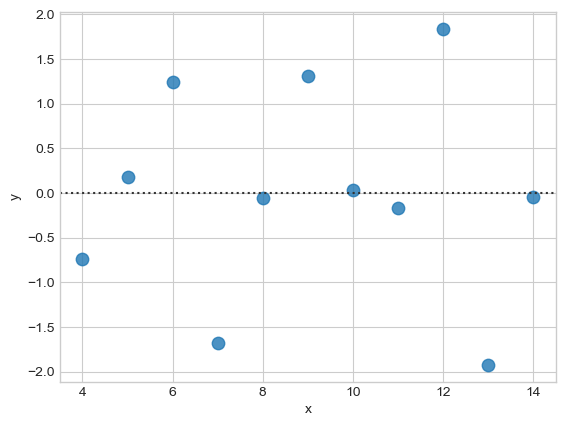

In [136]:
sns.residplot(x = "x", y = "y", data = anscombe.query("dataset == 'I'"),
             scatter_kws = {"s" : 80})

In [142]:
sns.residplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"),
             scatter_kws = {"s" : 80})

<AxesSubplot:xlabel='x', ylabel='y'>

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 300

x = 10*np.random.rand(n, 1)-5
y = 0.5 * x**2 + x + 2 + np.random.randn(n,1)

df = pd.DataFrame()


df["x"] = x.ravel()
df["y"] = y.ravel()

sns.residplot(x = "x", y = "y", data = df,
             scatter_kws = {"s" : 30, "alpha" : 0.5})

<AxesSubplot:xlabel='x', ylabel='y'>

## 다른 상황의 회귀

In [143]:
sns.jointplot(x = "body_mass_g", y ="flipper_length_mm", 
              kind = "reg", data = penguins)

In [144]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'long_bill'],
      dtype='object')

In [147]:
# 변수를 지정
sns.pairplot(penguins, 
             x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
             y_vars = ["body_mass_g"],hue = "species",
             height = 4, aspect =.8)

# 구조화된 다중 플롯 그리드

In [148]:
sns.set(style = "ticks")

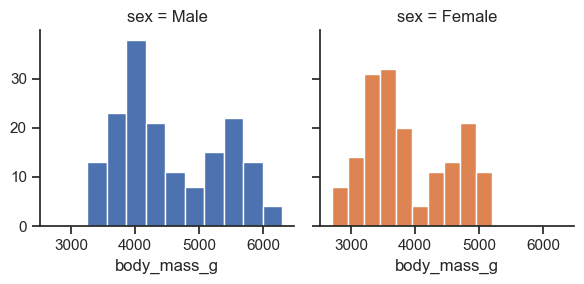

In [154]:
g = sns.FacetGrid(penguins, col = "sex", hue = "sex")
g.map(plt.hist, "body_mass_g")

In [155]:
g = sns.FacetGrid(penguins, col = "sex", hue = "sex")
g.map(plt.scatter, "bill_length_mm", "bill_depth_mm", alpha = .7)
g.add_legend()

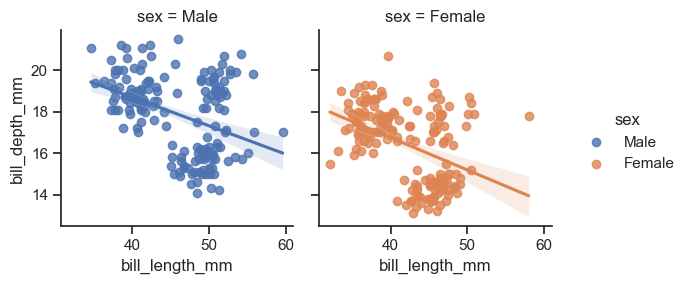

In [158]:
g = sns.FacetGrid(penguins, col = "sex", hue = "sex", margin_titles = True)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

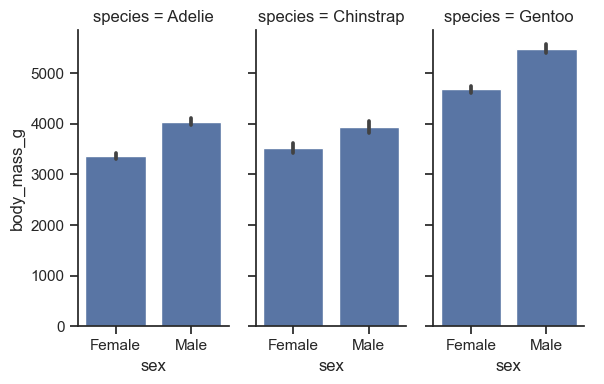

In [160]:
g = sns.FacetGrid(penguins, col = "species",height = 4, aspect = .5)
g.map(sns.barplot, "sex", "body_mass_g", order = ["Female", "Male"])
g.add_legend()

In [161]:
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


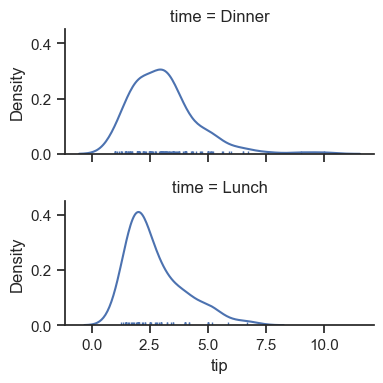

In [169]:
ordered_times = tips.time.value_counts().index
g = sns.FacetGrid(tips, row = "time", row_order = ordered_times,
                 height = 2, aspect = 2)
g.map(sns.distplot, "tip", hist = False, rug = True)

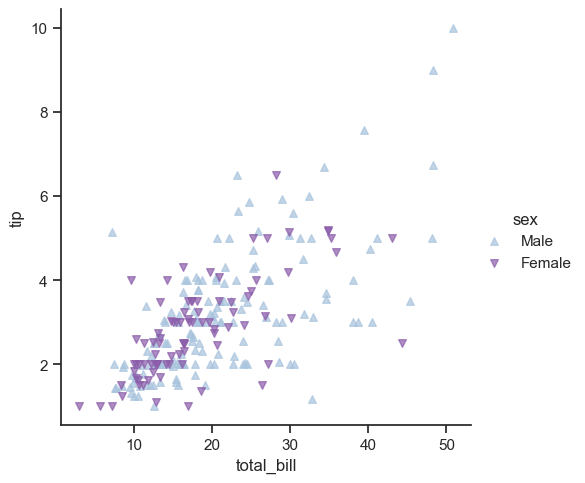

In [177]:
g = sns.FacetGrid(tips, hue = "sex", height = 5, palette = "BuPu",
                  hue_kws = {"marker":["^","v"]})
g.map(plt.scatter, "total_bill", "tip", s = 30, alpha = .7, lw = 1)
g.add_legend();

In [178]:
# col_wrap : 개수
g = sns.FacetGrid(tips, col = "day", col_wrap = 2, height = 4)
g.map(sns.pointplot, "sex", "tip", order = ["Female", "Male"])

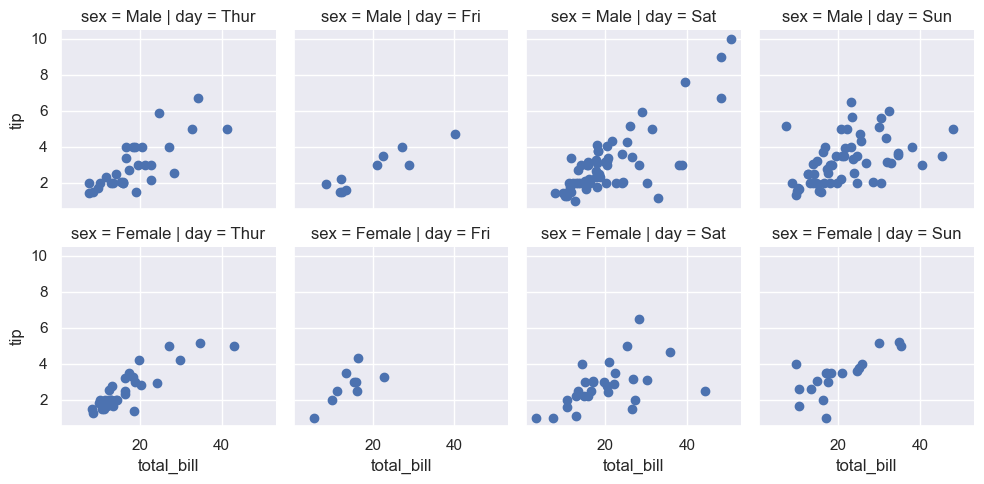

In [180]:
# margin_titles 각 서브플롯마다 제목 표시
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(tips, row = "sex", col = "day", margin_titles = False, height = 2.5)
g.map(plt.scatter, "total_bill", "tip")

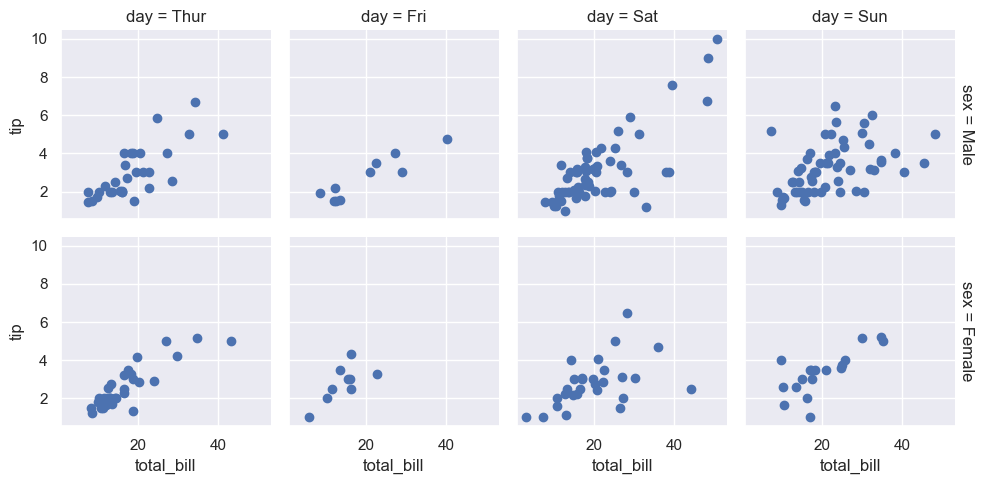

In [181]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(tips, row = "sex", col = "day", margin_titles = True, height = 2.5)
g.map(plt.scatter, "total_bill", "tip")

In [184]:
g = sns.FacetGrid(tips, col = "time", margin_titles = True, height = 4)
g.map(plt.scatter, "total_bill", "tip")

for ax in g.axes.flat:
    ax.plot((0,50),(0,.2*50), c= ".2", ls = ":")

In [186]:
r = np.linspace(0, 10, num = 100)
df = pd.DataFrame({'r':r, 'slow':r, 'medium':2*r, 'fast':4*r})
df = pd.melt(df, id_vars = ['r'], var_name = "speed",value_name = "theta")

g = sns.FacetGrid(df, col = "speed", hue = "speed",
                 subplot_kws = dict(projection = "polar"), height = 5,
                 sharex = False, sharey = False, despine = False)
g.map(sns.scatterplot, "theta", "r");

## 커스텀 함수

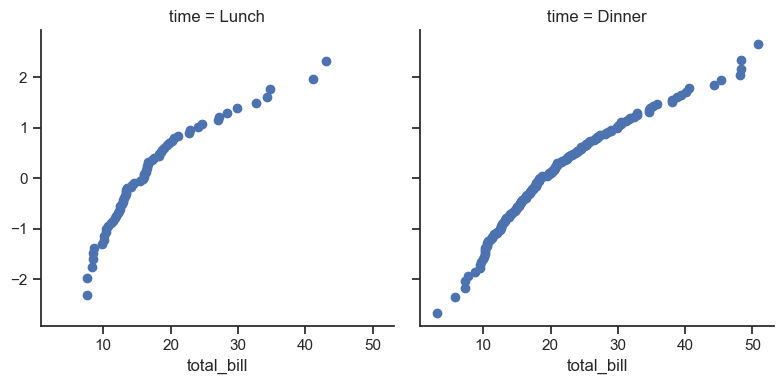

In [193]:
from scipy import stats

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit = False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col = "time", height = 4)
g.map(quantile_plot, "total_bill")

In [195]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit = False)
    _, yr = stats.probplot(y, fit = False)
    plt.scatter(xr,yr, **kwargs)
    
g = sns.FacetGrid(tips, col = "sex", height = 4)
g.map(qqplot, "total_bill", "tip");

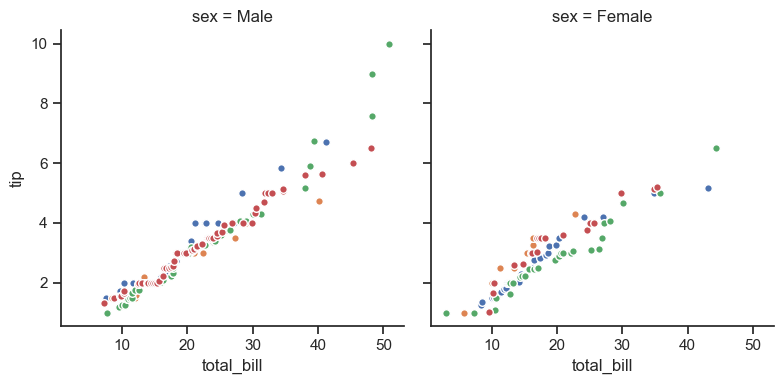

In [197]:
g = sns.FacetGrid(tips, col = "sex", height = 4, hue = "day")
g.map(qqplot, "total_bill", "tip", s= 30, edgecolor = "w");

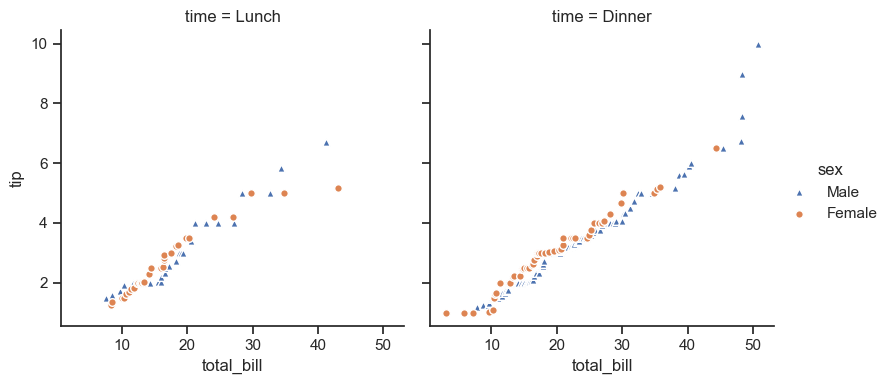

In [198]:
g = sns.FacetGrid(tips, col = "time", height = 4, hue = "sex",
                  hue_kws = {"marker" : ["^","o"]})
g.map(qqplot, "total_bill", "tip", s= 30, edgecolor = "w")
g.add_legend();

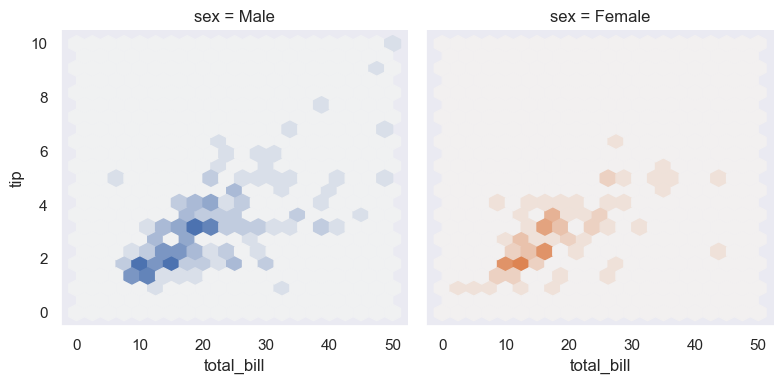

In [199]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 20, cmap = cmap, **kwargs)
    
with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue = "sex", col = "sex", height = 4)

g.map(hexbin, "total_bill", "tip", extent = [0,50,0,10]);

## 페어와이즈 데이터 관계

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")

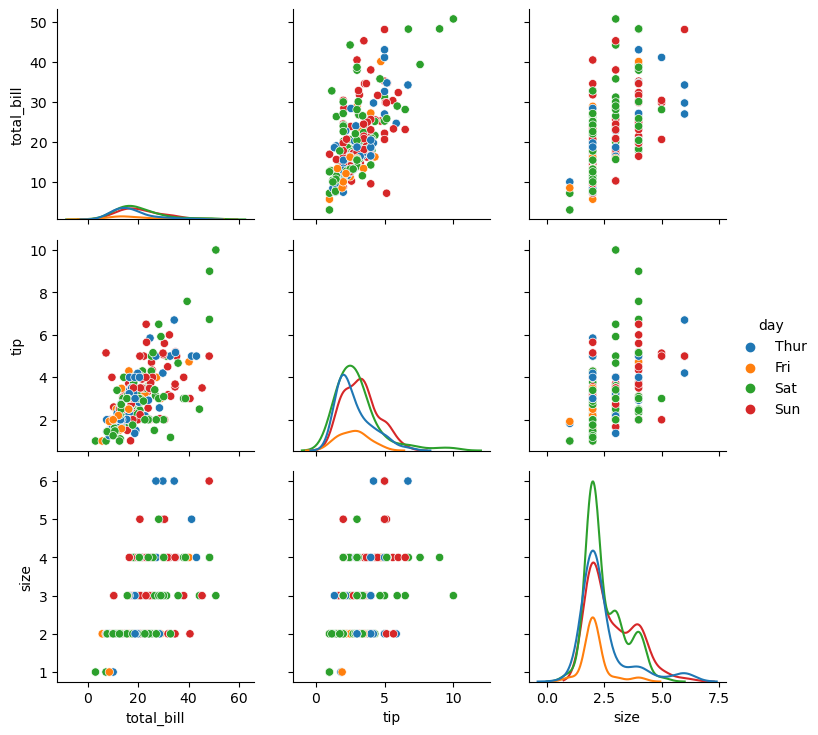

In [3]:
g = sns.PairGrid(tips, hue = "day")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

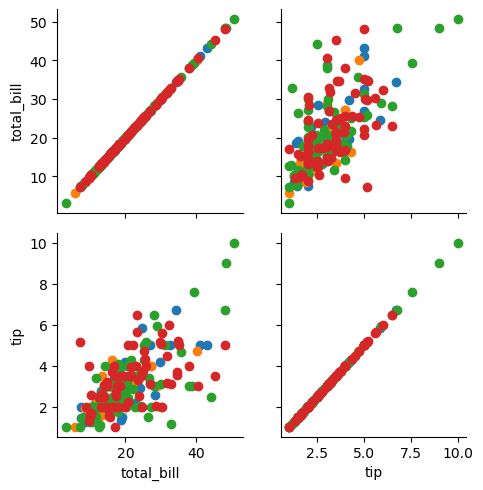

In [12]:
g = sns.PairGrid(tips, vars = ["total_bill", "tip"], hue = "day")
g.map(plt.scatter)

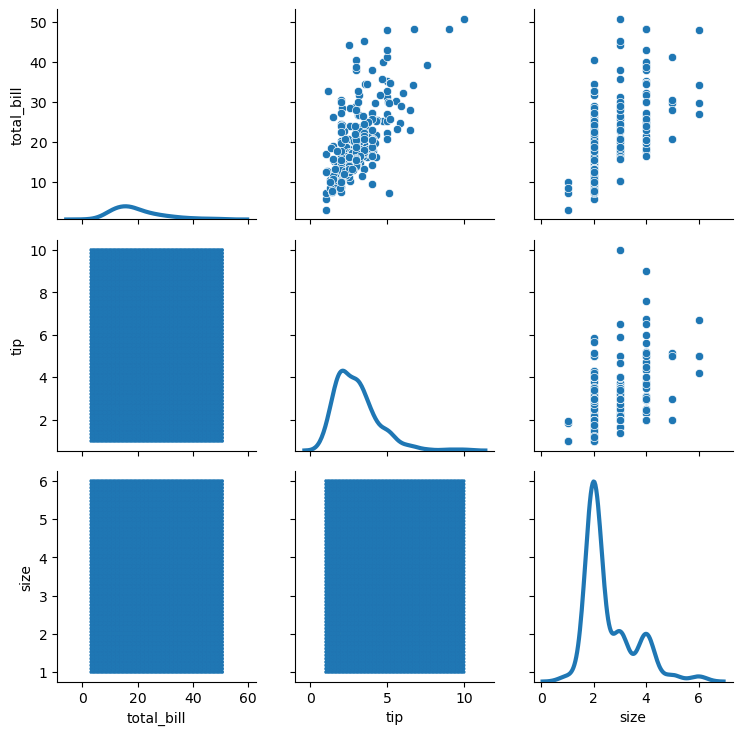

In [16]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot, lw = 3,legend = False)
g.map_upper(sns.scatterplot)
g.map_lower(plt.hexbin)
g.add_legend();

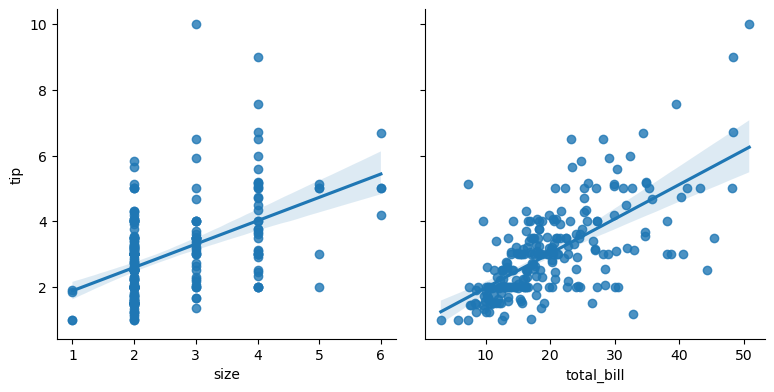

In [18]:
g = sns.PairGrid(tips, y_vars = ["tip"], x_vars = ["size", "total_bill"], height = 4)
g.map(sns.regplot)

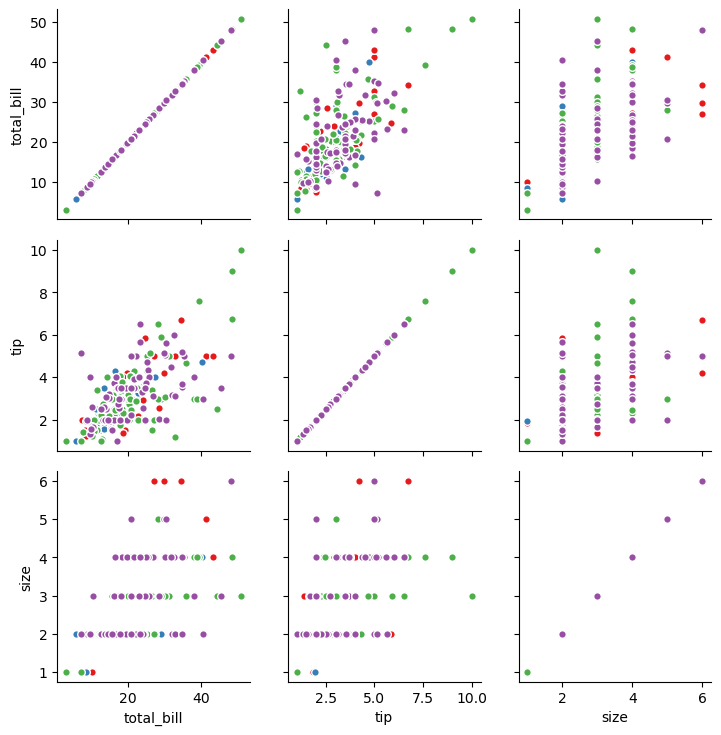

In [19]:
g = sns.PairGrid(tips, hue = "day", palette = "Set1")
g.map(plt.scatter, s = 30, edgecolor = "white")

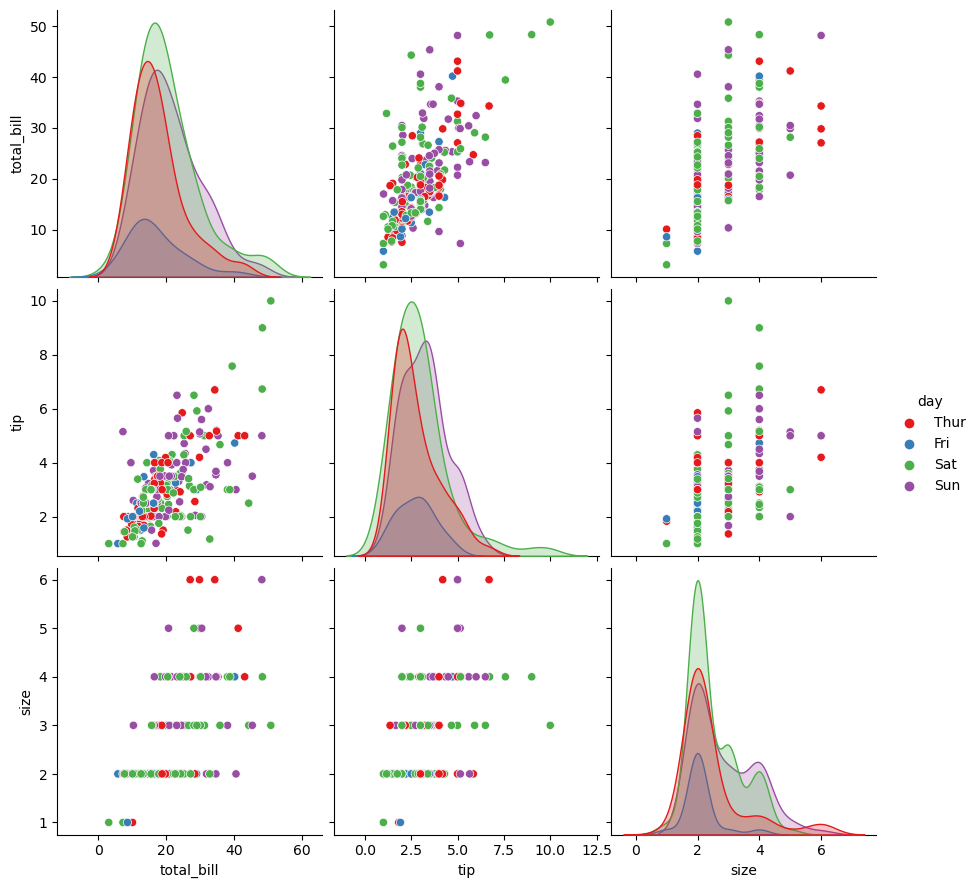

In [20]:
sns.pairplot(tips, hue = "day", palette = "Set1", diag_kind = "kde", height = 3)

# 그림 미학 제어

In [21]:
def randplot(flip = 1):
    for i in range(1,7):
        plt.plot(np.random.randn(50).cumsum())

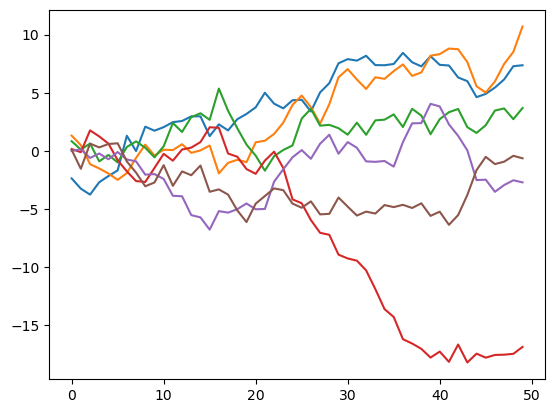

In [24]:
randplot();

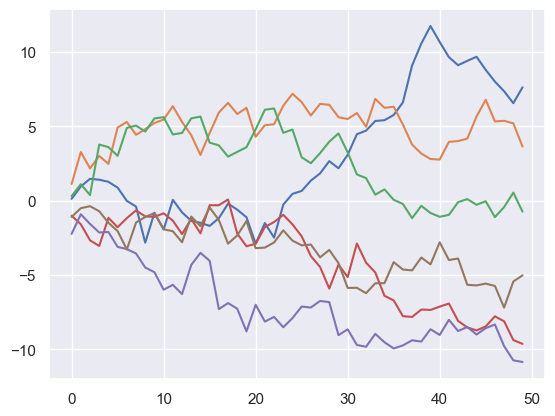

In [26]:
sns.set()
randplot();

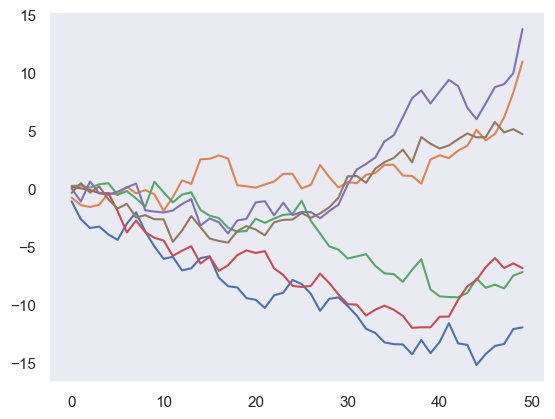

In [27]:
sns.set_style("dark")
randplot();

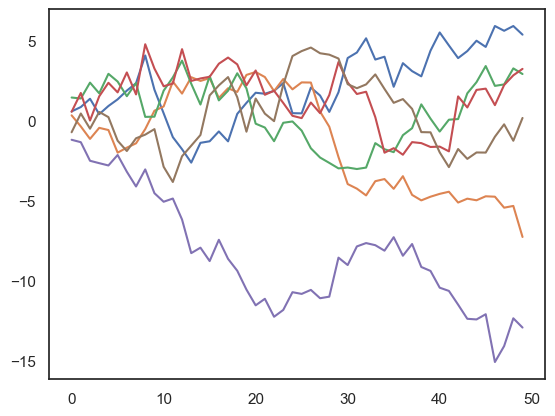

In [28]:
sns.set_style("white")
randplot();

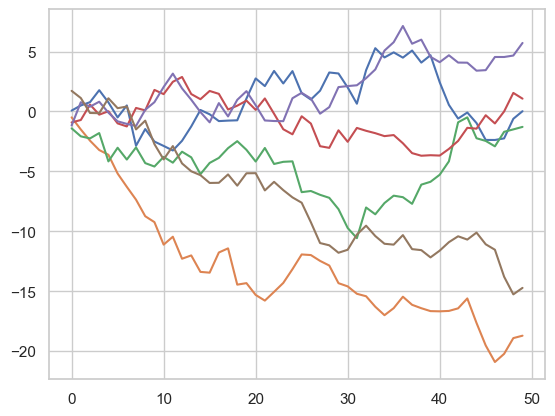

In [30]:
sns.set_style("whitegrid")
randplot();

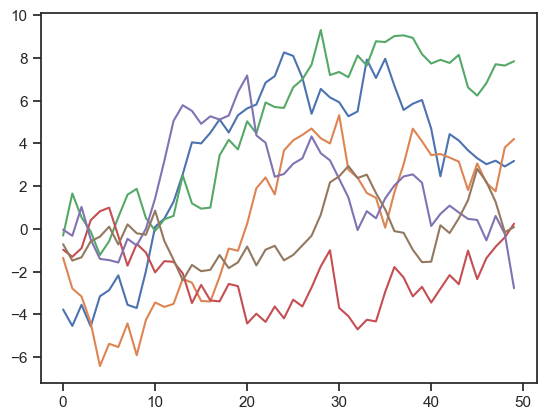

In [31]:
sns.set_style("ticks")
randplot();

## 축 스핀 제거

In [32]:
d = np.random.randn(50).reshape(10,5)

C:\Users\User\AppData\Local\Temp\ipykernel_19608\79418252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


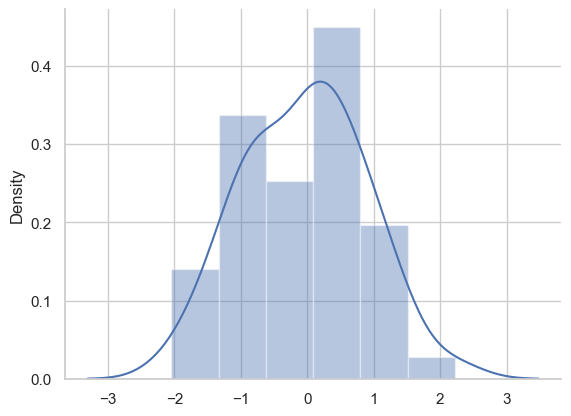

In [36]:
sns.set_style("whitegrid")
sns.distplot(d)
sns.despine()

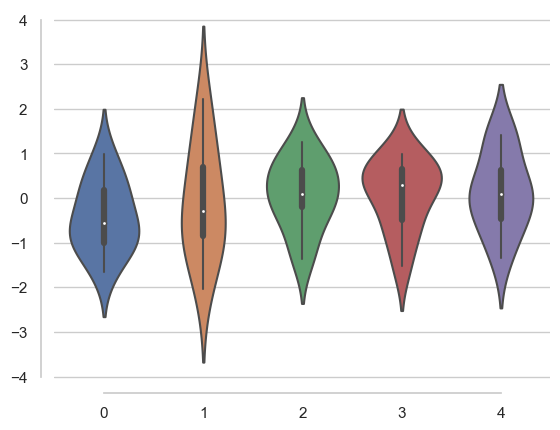

In [37]:
sns.violinplot(data = d)
sns.despine(offset = 10, trim = True)

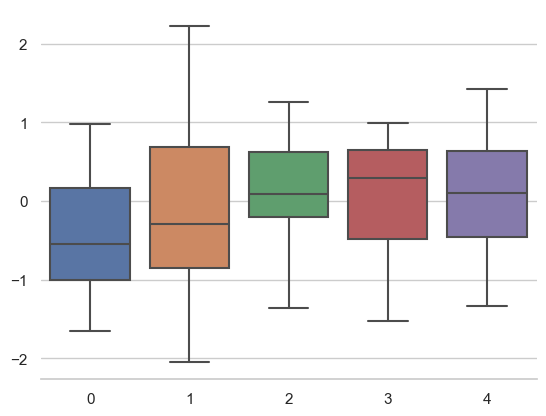

In [40]:
sns.boxplot(d,palette = "deep")
sns.despine(left = True)

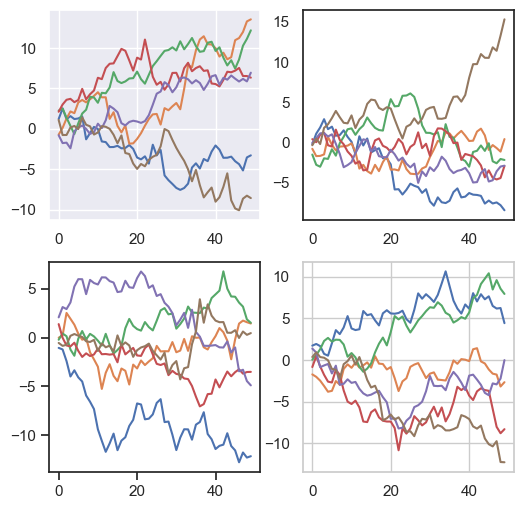

In [42]:
f = plt.figure(figsize = (6,6))
gs = f.add_gridspec(2,2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0,0])
    randplot()
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0,1])
    randplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1,0])
    randplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1,1])
    randplot()

## 스타일 요소 재정의

In [43]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

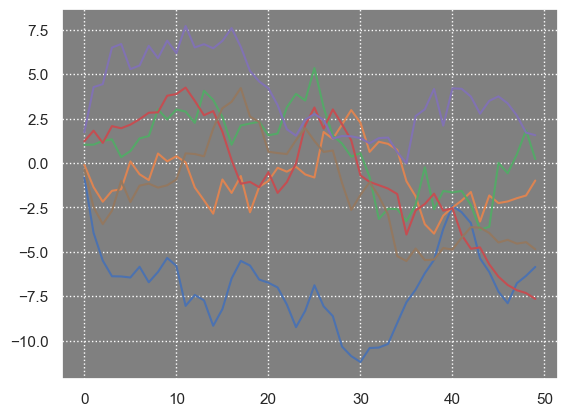

In [46]:
sns.set_style("darkgrid", {"axes.facecolor": ".5", "grid.linestyle" : ":"})
randplot();

## 스케일링 플롯 요소

In [47]:
sns.set()

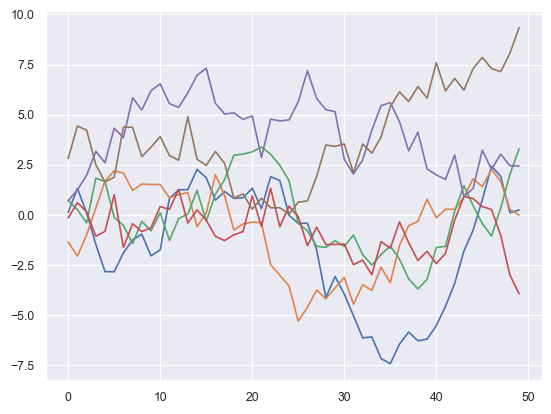

In [49]:
sns.set_context("paper")
randplot();

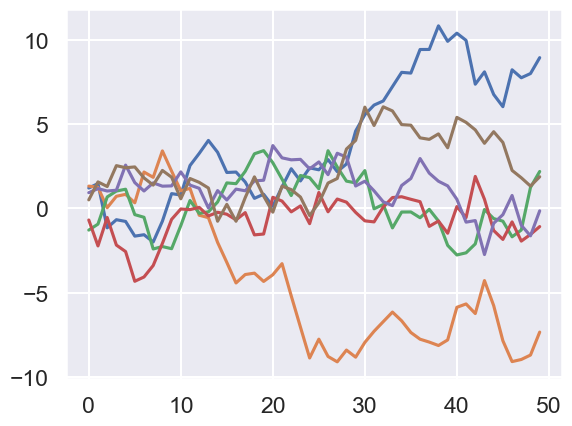

In [50]:
sns.set_context("talk")
randplot();

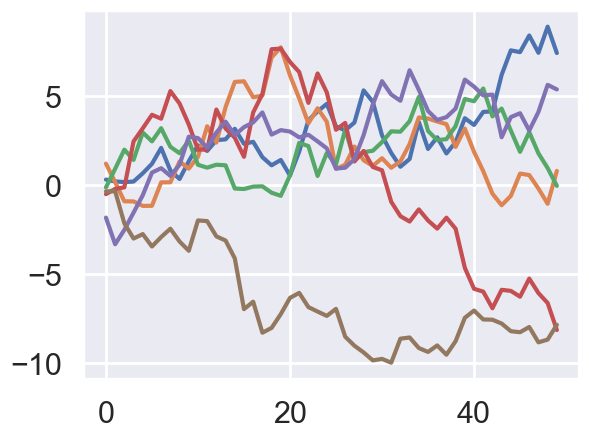

In [51]:
sns.set_context("poster")
randplot();

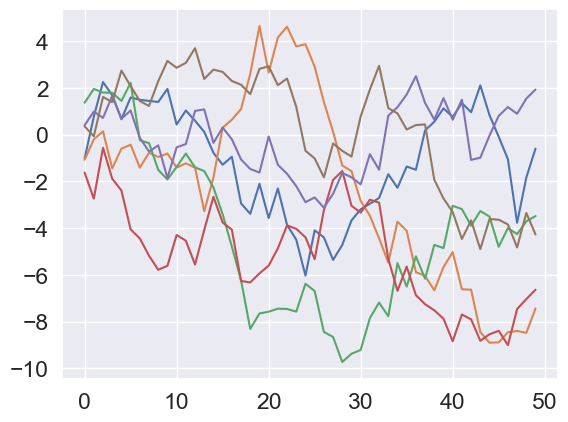

In [52]:
sns.set_context("notebook", font_scale = 1.5, rc = {"line.linewidth":2.5})
randplot();

## 컬러 팔레트 선택

In [53]:
# 질적 색상 팔레트

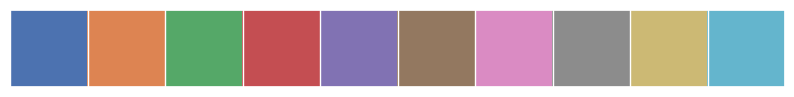

In [55]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

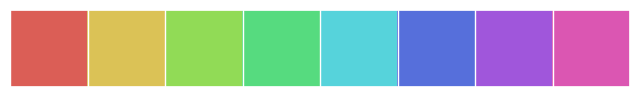

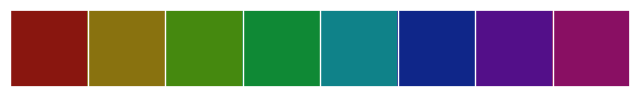

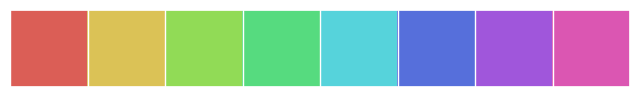

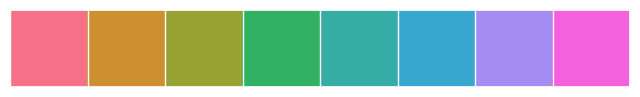

In [56]:
sns.palplot(sns.color_palette("hls",8))
sns.palplot(sns.hls_palette(8, l =.3, s = .8))
sns.palplot(sns.color_palette("hls",8))
sns.palplot(sns.color_palette("husl",8))